### Librerías a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#Welch
from scipy import signal
from scipy.interpolate import interp1d
import numpy as np

#### 45dg

In [2]:
#Directorio a recorrer
path_mat = '/home/bryan/Escritorio/Ayudantías 2021/070619/'

def Ficheros(path, formato):
    contenido = os.listdir(path)

    #Acumulador del nombre de las   imagenes a utilizar
    archivos = []

    #Se recorre el path para obtener los nombre y se los aggrega al acumulador, en este caso la lista
    for fichero in contenido:
        if os.path.isfile(os.path.join(path, fichero)) and fichero.endswith(formato):
            archivos.append(fichero)
            
    return archivos


#Verificar si obtiene los archivos
Archivos = Ficheros(path_mat, '.csv')

dstream = []
ustream = []

for archivo in Archivos:
    if 'downstream' in archivo:
        dstream.append(archivo)
    elif 'upstream' in archivo:
        ustream.append(archivo)

In [3]:
dstream.sort()
ustream.sort()

In [4]:
dstream, ustream

(['Bent_cylinder_L100_downstream45deg_wind_speeds.csv',
  'Bent_cylinder_L100_downstream45deg_y0.csv',
  'Bent_cylinder_L100_downstream45deg_y1.csv',
  'Bent_cylinder_L100_downstream45deg_y10.csv',
  'Bent_cylinder_L100_downstream45deg_y2.csv',
  'Bent_cylinder_L100_downstream45deg_y3.csv',
  'Bent_cylinder_L100_downstream45deg_y4.csv',
  'Bent_cylinder_L100_downstream45deg_y5.csv',
  'Bent_cylinder_L100_downstream45deg_y6.csv',
  'Bent_cylinder_L100_downstream45deg_y7.csv',
  'Bent_cylinder_L100_downstream45deg_y8.csv',
  'Bent_cylinder_L100_downstream45deg_y9.csv',
  'Bent_cylinder_L100_downstream45deg_yminus1.csv',
  'Bent_cylinder_L100_downstream45deg_yminus2.csv'],
 ['Bent_cylinder_L100_upstream45deg_wind_speeds.csv',
  'Bent_cylinder_L100_upstream45deg_y0.csv',
  'Bent_cylinder_L100_upstream45deg_y1.csv',
  'Bent_cylinder_L100_upstream45deg_y10.csv',
  'Bent_cylinder_L100_upstream45deg_y2.csv',
  'Bent_cylinder_L100_upstream45deg_y3.csv',
  'Bent_cylinder_L100_upstream45deg_y4.cs

#### Velocidades DownStream

In [5]:
velocity = pd.read_csv(path_mat + dstream[0])
velocity.head()

PVDF peak  mA  PVDF peak V  PVDF peak power  n/a  Solar mA 1  Solar V 1  \
0        0.00007          0.0              0.0  0.0         inf    0.00127   
1        0.00007          0.0              0.0  0.0         inf    0.00126   
2        0.00007          0.0              0.0  0.0         inf    0.00128   
3        0.00007          0.0              0.0  0.0         inf    0.00129   
4        0.00007          0.0              0.0  0.0         inf    0.00128   

   solar mW 1  tunnel P  tunnel V      Patm  Tatm  num of 470k  Solar mA 2  \
0         inf   0.69464   1.07902  100392.0  20.0          0.0         inf   
1         inf   1.07329   1.34125  100392.0  20.0          0.0         inf   
2         inf   1.47171   1.57059  100392.0  20.0          0.0         inf   
3         inf   4.43973   2.72791  100392.0  20.0          0.0         inf   
4         inf   8.50778   3.77624  100392.0  20.0          0.0         inf   

   Solar V 2  Solar mW 2  
0    0.00129         inf  
1    0.00129         inf  
2    0.00130         inf  
3    0.00131         inf  
4    0.00130         inf

In [6]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.describe()

tunnel V
count  208.000000
mean     7.506453
std      4.321601
min      0.897034
25%      3.317401
50%      7.110383
75%     10.884373
max     14.762540

In [7]:
df_prueba = pd.read_csv(path_mat + dstream[1])
df_prueba.describe()

0.80183
count  1.599999e+06
mean   7.515703e+00
std    4.559536e+00
min    4.451300e-01
25%    3.658400e+00
50%    7.341180e+00
75%    1.110553e+01
max    2.491363e+01

## Graficas Downstream

## y-2

Velocity:  0.9266623760000001
Max Frequency value:  78.125


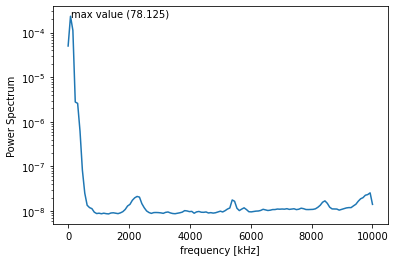


Velocity:  1.1518655
Max Frequency value:  156.25


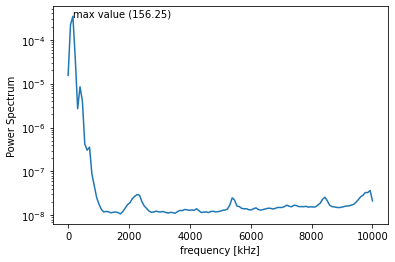


Velocity:  1.348822692
Max Frequency value:  78.125


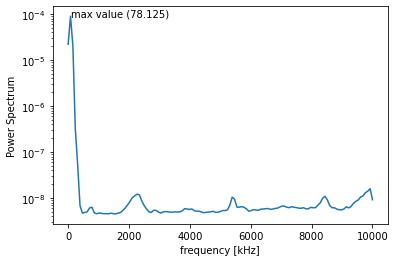


Velocity:  2.342729108
Max Frequency value:  156.25


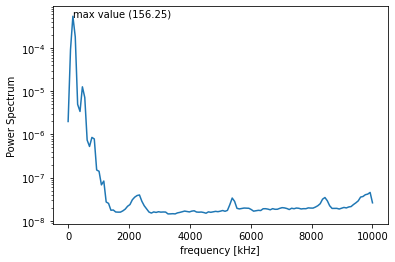


Velocity:  3.243034912
Max Frequency value:  312.5


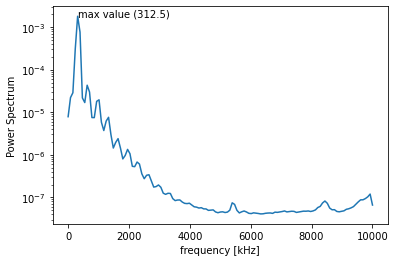


Velocity:  4.273156924
Max Frequency value:  468.75


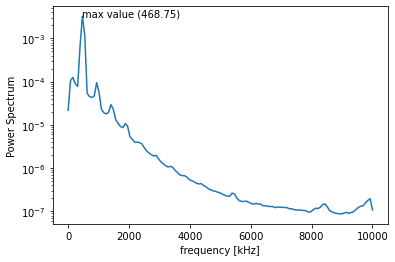


Velocity:  5.229851536
Max Frequency value:  625.0


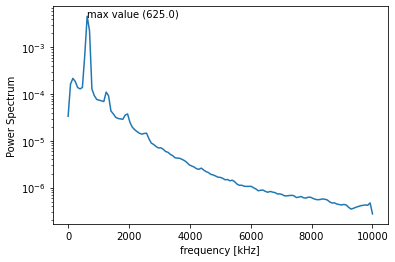


Velocity:  6.10353454
Max Frequency value:  781.25


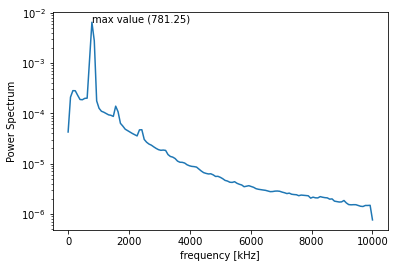


Velocity:  7.119056951999999
Max Frequency value:  937.5


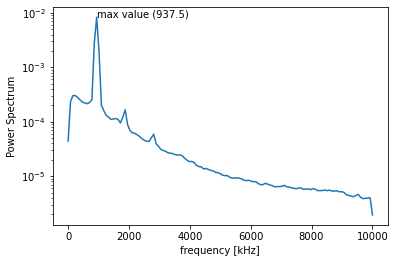


Velocity:  8.029419304
Max Frequency value:  1093.75


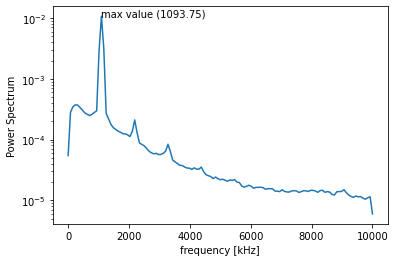


Velocity:  8.937325488
Max Frequency value:  1250.0


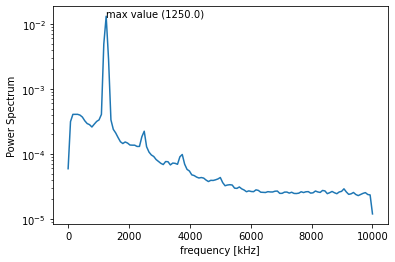


Velocity:  9.893582111999999
Max Frequency value:  1406.25


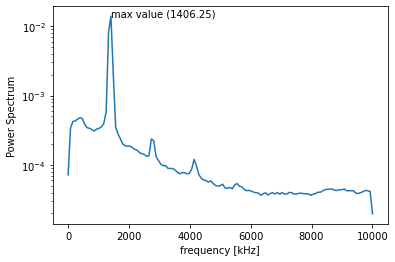


Velocity:  10.869891716
Max Frequency value:  1562.5


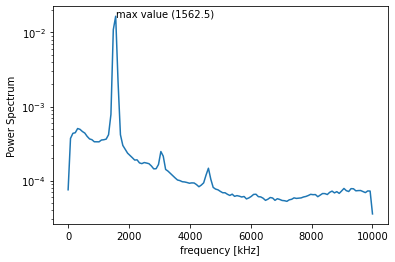


Velocity:  11.790370732
Max Frequency value:  1718.75


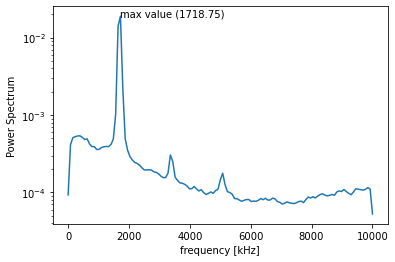


Velocity:  13.643025620000001
Max Frequency value:  1796.875


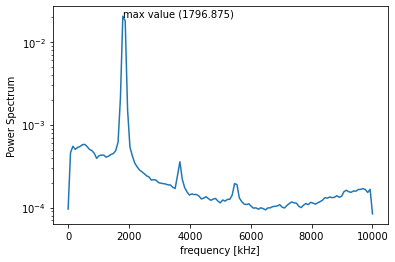


Velocity:  14.601205956000001
Max Frequency value:  2109.375


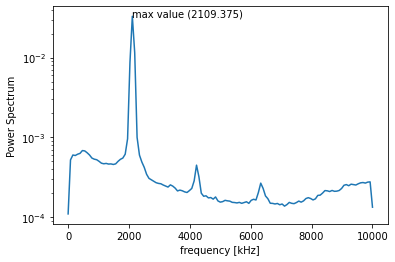

In [8]:
df = pd.read_csv(path_mat + dstream[-1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

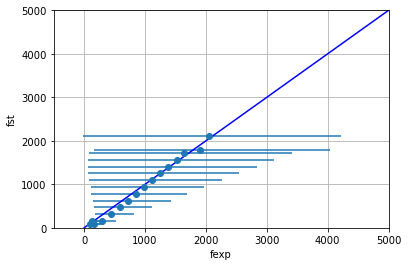

In [9]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



## y-1

Velocity:  1.018871732
Max Frequency value:  78.125


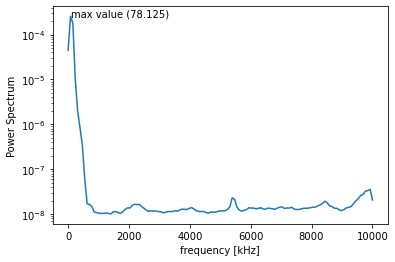


Velocity:  1.4385243520000002
Max Frequency value:  156.25


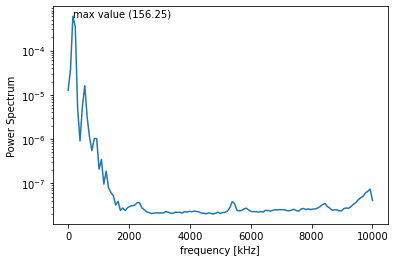


Velocity:  2.36951508
Max Frequency value:  312.5


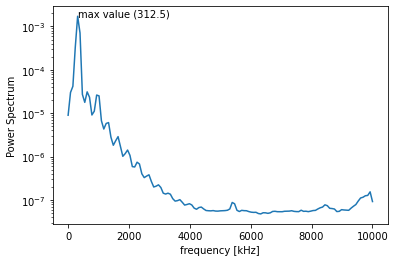


Velocity:  3.2493385040000002
Max Frequency value:  468.75


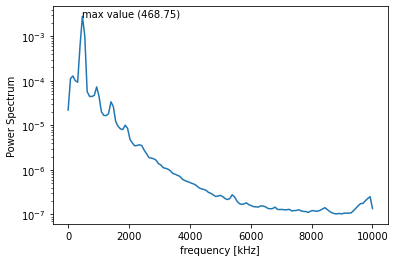


Velocity:  4.167919572000001
Max Frequency value:  625.0


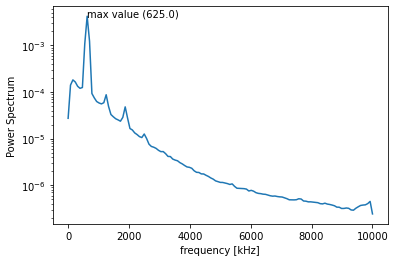


Velocity:  5.2084845920000005
Max Frequency value:  781.25


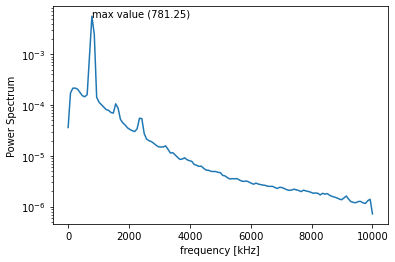


Velocity:  6.142601352
Max Frequency value:  937.5


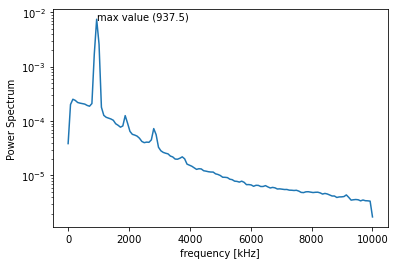


Velocity:  7.015408380000001
Max Frequency value:  1093.75


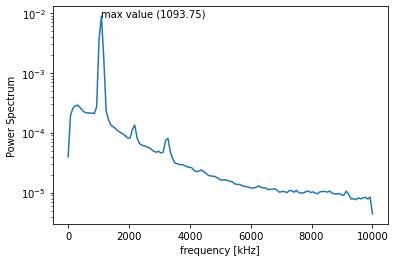


Velocity:  8.002461572
Max Frequency value:  1250.0


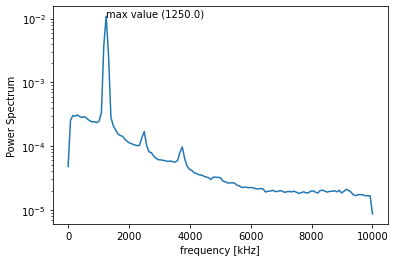


Velocity:  8.881769715999999
Max Frequency value:  1406.25


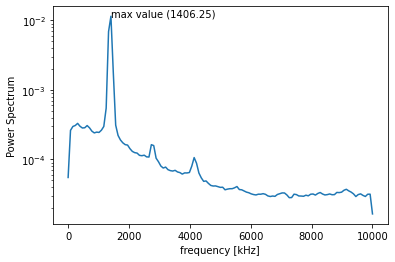


Velocity:  9.856825472
Max Frequency value:  1562.5


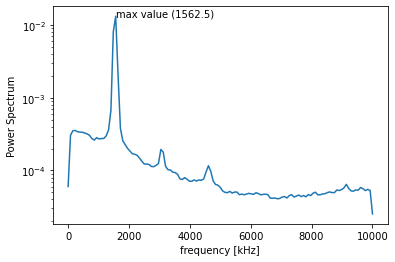


Velocity:  10.8116479
Max Frequency value:  1718.75


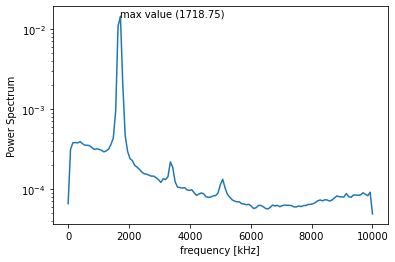


Velocity:  11.764778492
Max Frequency value:  1875.0


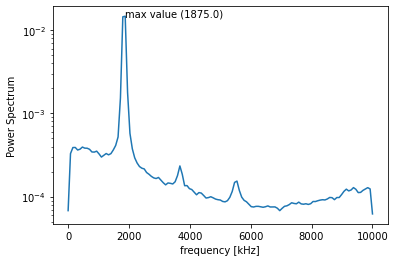


Velocity:  12.750363136
Max Frequency value:  2031.25


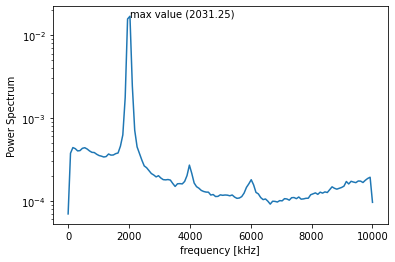


Velocity:  13.679730732
Max Frequency value:  2109.375


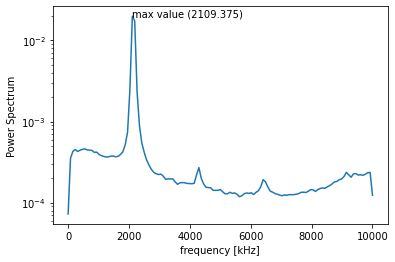


Velocity:  14.554710524
Max Frequency value:  2265.625


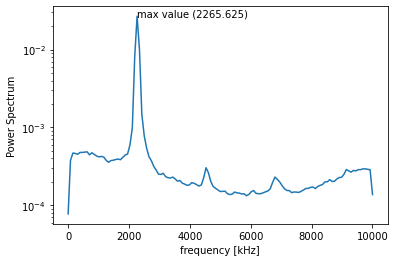

In [10]:
df1 = pd.read_csv(path_mat + dstream[-2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

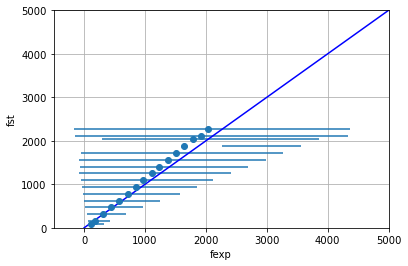

In [11]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y0

Velocity:  0.932072816
Max Frequency value:  78.125


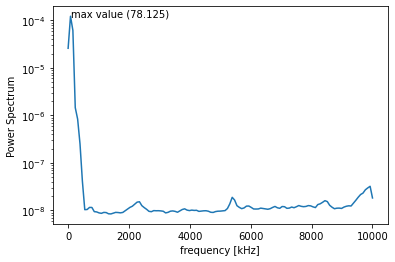


Velocity:  1.347482964
Max Frequency value:  156.25


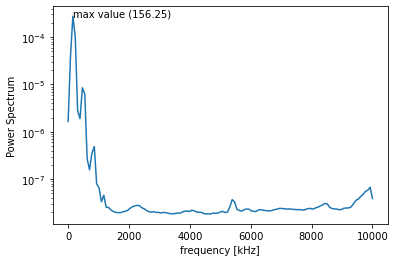


Velocity:  2.34813096
Max Frequency value:  312.5


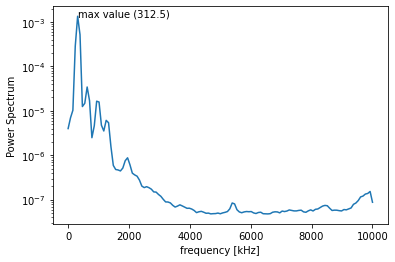


Velocity:  3.315036704
Max Frequency value:  468.75


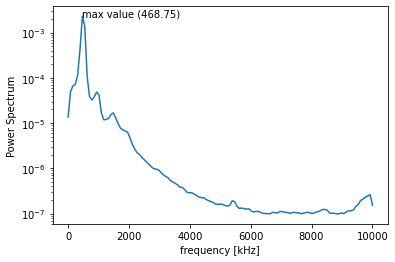


Velocity:  4.226901956
Max Frequency value:  625.0


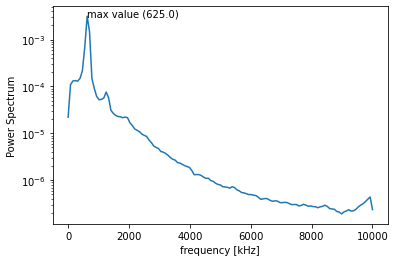


Velocity:  5.214315844
Max Frequency value:  781.25


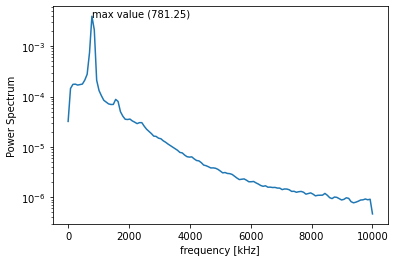


Velocity:  6.11667418
Max Frequency value:  937.5


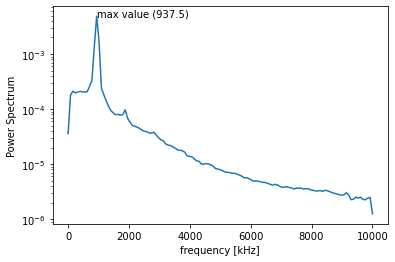


Velocity:  7.035083488000001
Max Frequency value:  1093.75


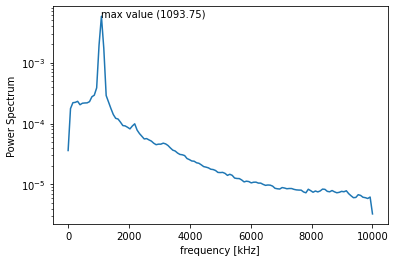


Velocity:  7.966203036
Max Frequency value:  1250.0


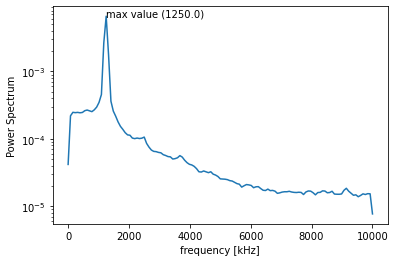


Velocity:  8.857182272
Max Frequency value:  1406.25


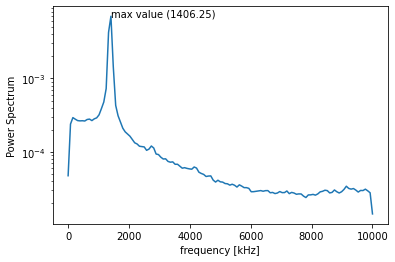


Velocity:  9.83600816
Max Frequency value:  1562.5


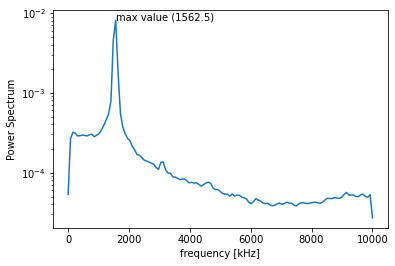


Velocity:  10.811209911999999
Max Frequency value:  1718.75


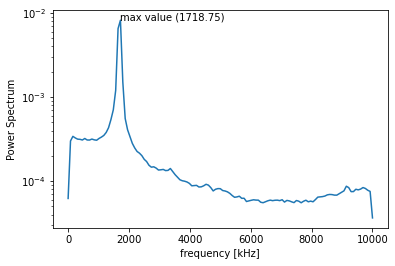


Velocity:  11.748770460000001
Max Frequency value:  1875.0


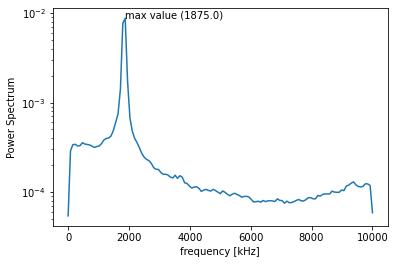


Velocity:  12.732165164
Max Frequency value:  2031.25


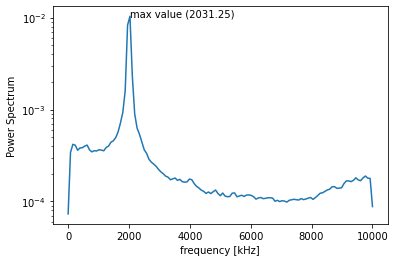


Velocity:  13.688447552
Max Frequency value:  2109.375


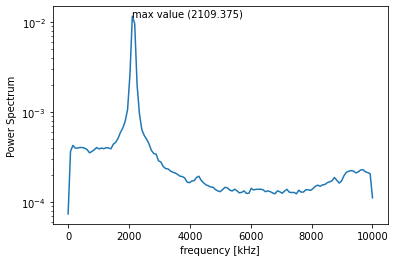


Velocity:  14.588839236000002
Max Frequency value:  2265.625


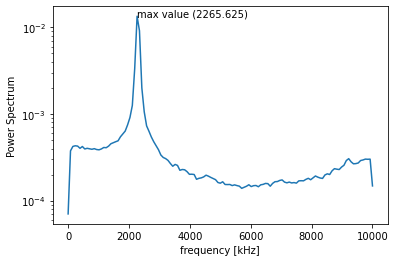

In [12]:
df2 = pd.read_csv(path_mat + dstream[1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 2*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df2[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

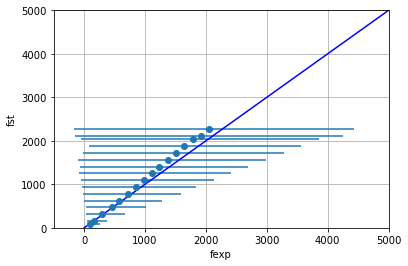

In [13]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y1

Velocity:  0.90521814
Max Frequency value:  78.125


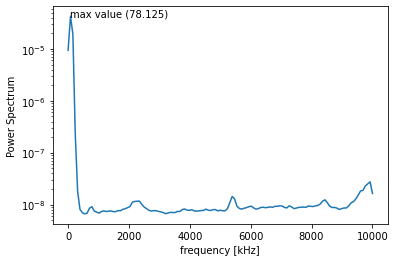


Velocity:  1.422868428
Max Frequency value:  156.25


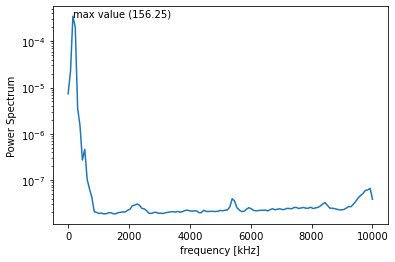


Velocity:  2.344919048
Max Frequency value:  312.5


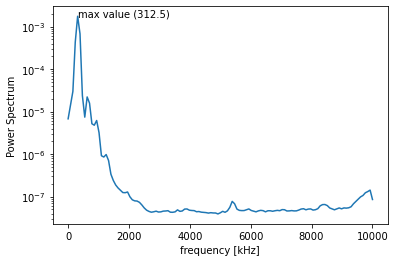


Velocity:  3.249115216
Max Frequency value:  468.75


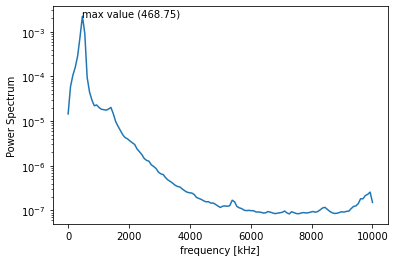


Velocity:  4.235326784
Max Frequency value:  625.0


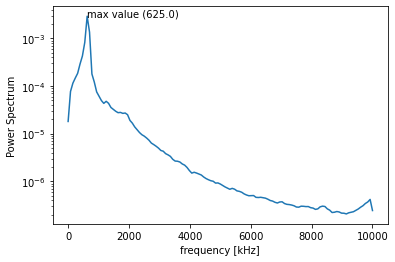


Velocity:  5.210159252
Max Frequency value:  781.25


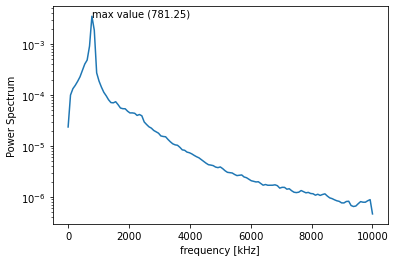


Velocity:  6.083103688000001
Max Frequency value:  937.5


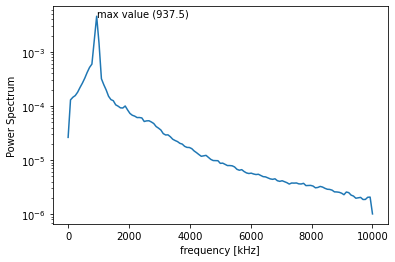


Velocity:  7.08776228
Max Frequency value:  1093.75


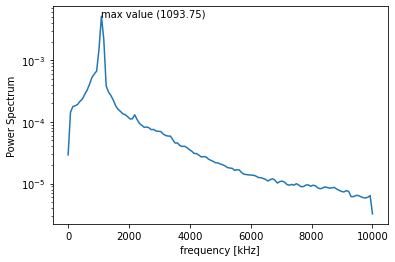


Velocity:  7.970436920000001
Max Frequency value:  1250.0


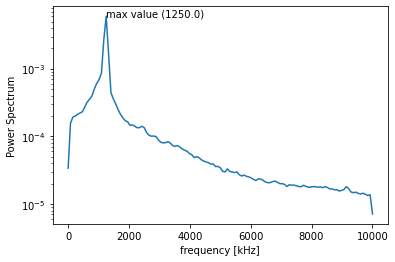


Velocity:  8.976976284000001
Max Frequency value:  1406.25


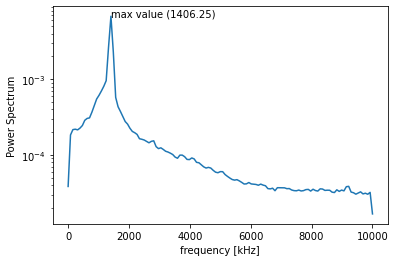


Velocity:  9.96718986
Max Frequency value:  1562.5


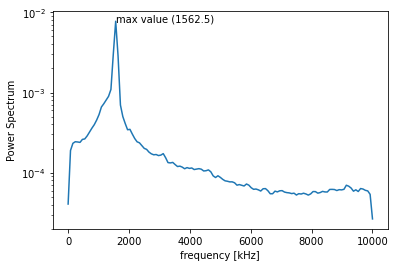


Velocity:  10.770906428
Max Frequency value:  1718.75


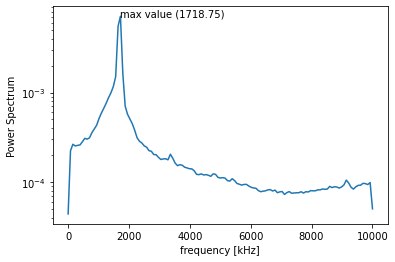


Velocity:  11.715294436000002
Max Frequency value:  1875.0


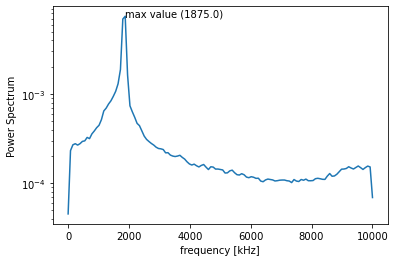


Velocity:  12.763683123999998
Max Frequency value:  2031.25


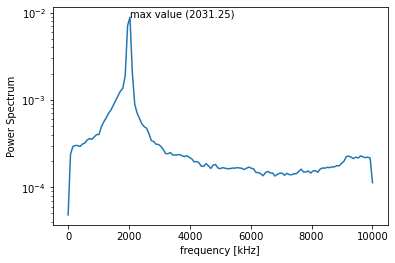


Velocity:  13.727308252
Max Frequency value:  2187.5


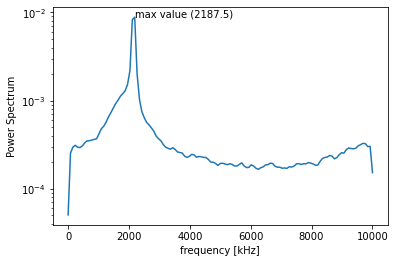


Velocity:  14.60793036
Max Frequency value:  2265.625


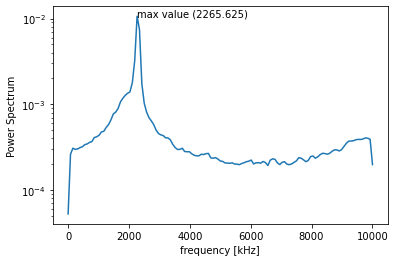

In [14]:
df3 = pd.read_csv(path_mat + dstream[2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 3*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df3[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

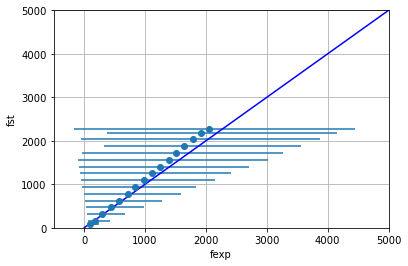

In [15]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

Velocity:  0.9814538160000001
Max Frequency value:  78.125


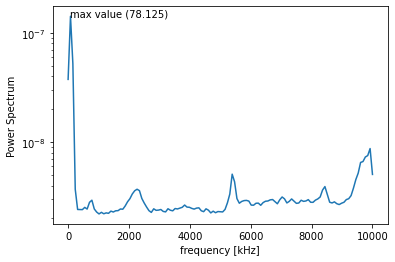


Velocity:  1.35209472
Max Frequency value:  156.25


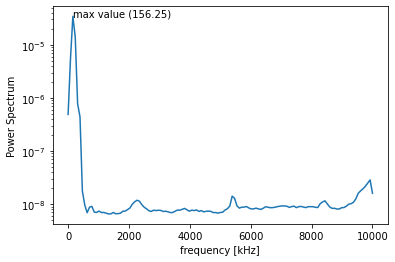


Velocity:  2.353567164
Max Frequency value:  312.5


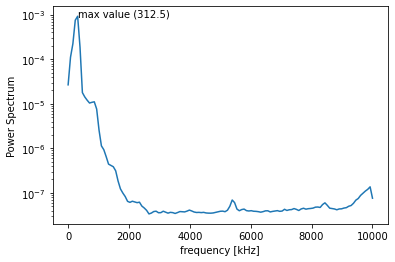


Velocity:  3.3096692040000004
Max Frequency value:  390.625


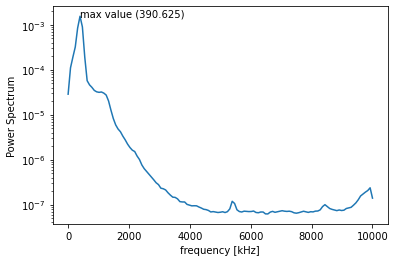


Velocity:  4.2495227479999995
Max Frequency value:  546.875


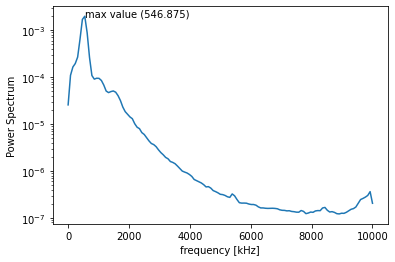


Velocity:  5.187461168
Max Frequency value:  625.0


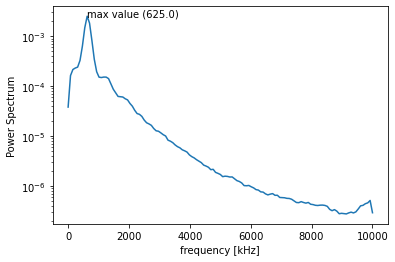


Velocity:  6.133755711999999
Max Frequency value:  781.25


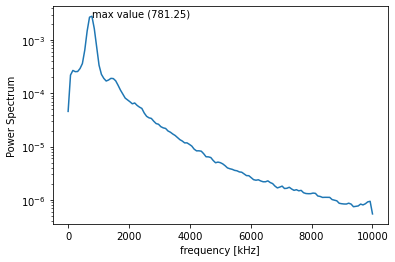


Velocity:  7.082016908000001
Max Frequency value:  859.375


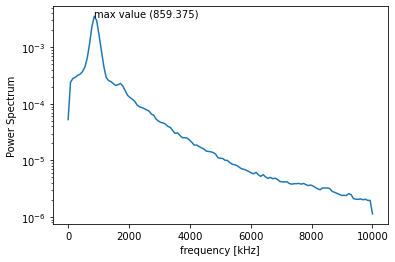


Velocity:  7.9930663
Max Frequency value:  1015.625


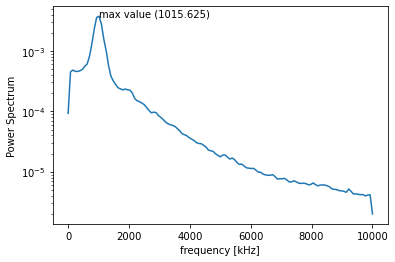


Velocity:  8.905154840000002
Max Frequency value:  1093.75


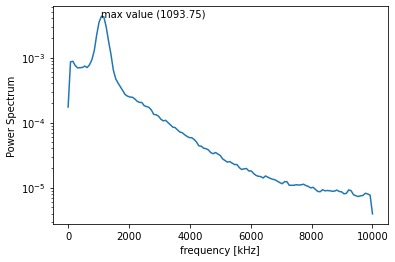


Velocity:  9.930665095999998
Max Frequency value:  1250.0


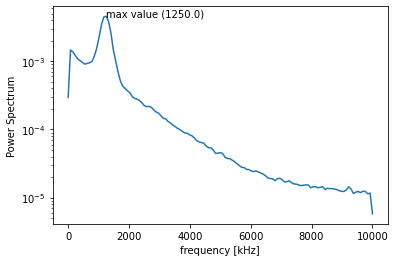


Velocity:  10.780748275999999
Max Frequency value:  1328.125


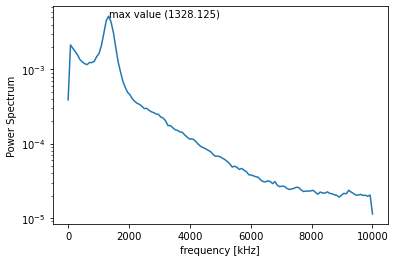


Velocity:  11.732401732
Max Frequency value:  1406.25


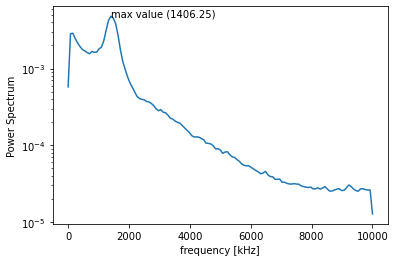


Velocity:  12.669498528
Max Frequency value:  1562.5


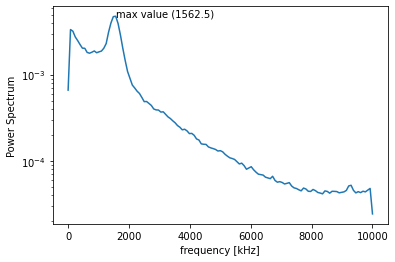


Velocity:  13.672551164
Max Frequency value:  78.125


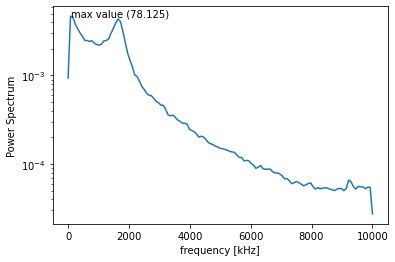


Velocity:  14.616870468
Max Frequency value:  78.125


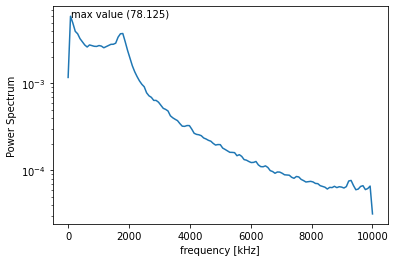

In [16]:
df4 = pd.read_csv(path_mat + dstream[3], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 4*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df4[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

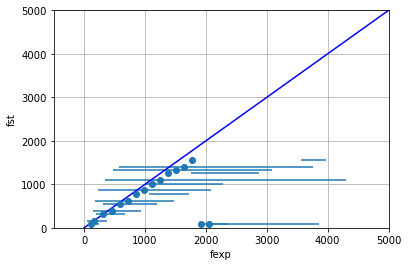

In [17]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y3

Velocity:  0.9510522960000001
Max Frequency value:  78.125


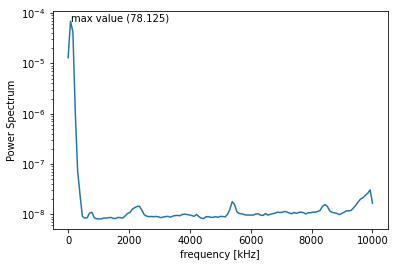


Velocity:  1.429661536
Max Frequency value:  156.25


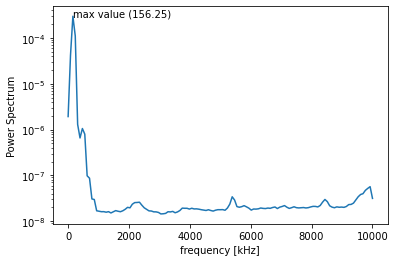


Velocity:  2.389293244
Max Frequency value:  312.5


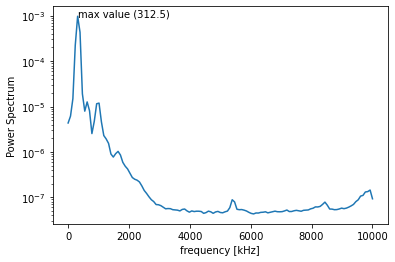


Velocity:  3.286825124
Max Frequency value:  468.75


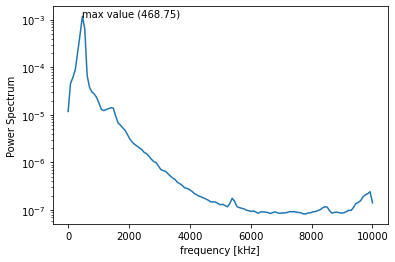


Velocity:  4.225871396
Max Frequency value:  625.0


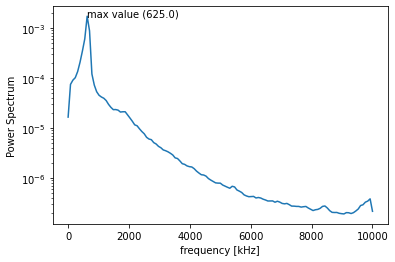


Velocity:  5.159258176
Max Frequency value:  781.25


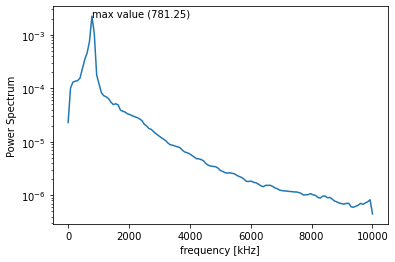


Velocity:  6.090042792
Max Frequency value:  937.5


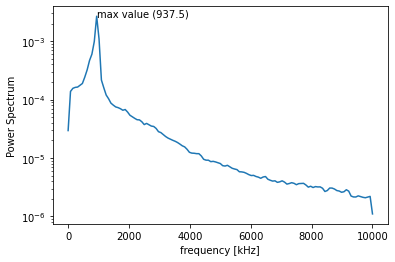


Velocity:  7.1017091919999995
Max Frequency value:  1093.75


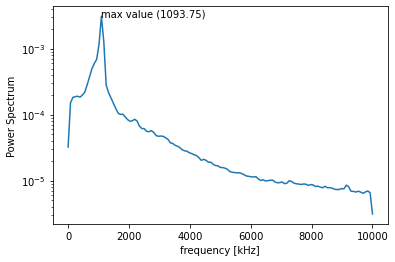


Velocity:  7.959332636
Max Frequency value:  1250.0


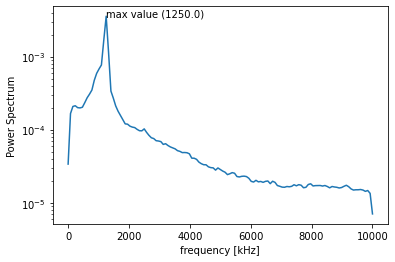


Velocity:  8.974940928
Max Frequency value:  1406.25


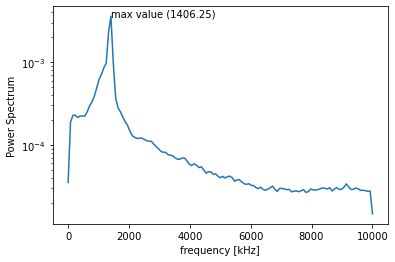


Velocity:  9.933593604
Max Frequency value:  1562.5


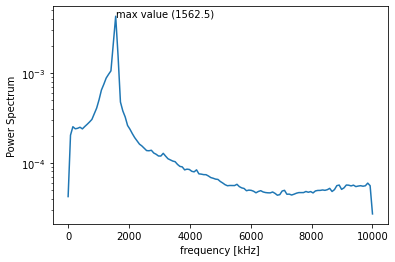


Velocity:  10.894762564
Max Frequency value:  1718.75


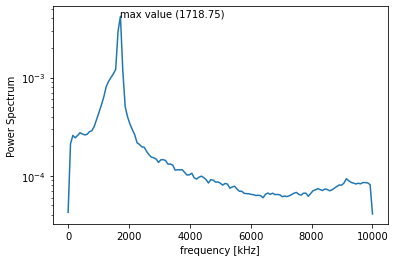


Velocity:  11.725265104
Max Frequency value:  1875.0


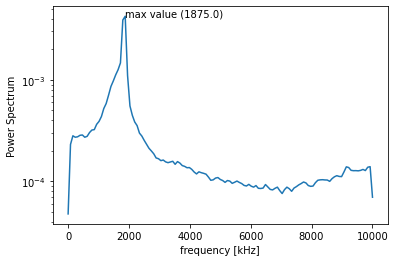


Velocity:  12.748568244
Max Frequency value:  1953.125


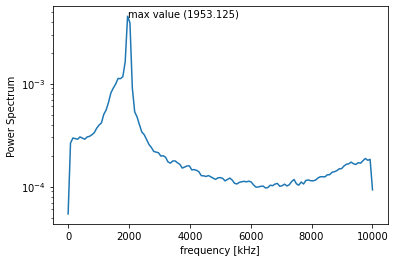


Velocity:  13.647654551999999
Max Frequency value:  2109.375


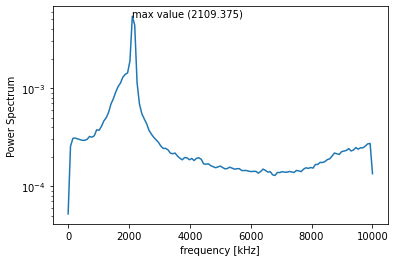


Velocity:  14.574162344
Max Frequency value:  2265.625


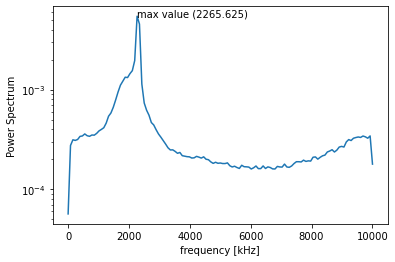

In [18]:
df5 = pd.read_csv(path_mat + dstream[4], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 5*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df5[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

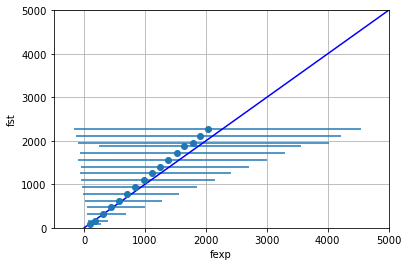

In [19]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y4

Velocity:  0.9752189280000001
Max Frequency value:  78.125


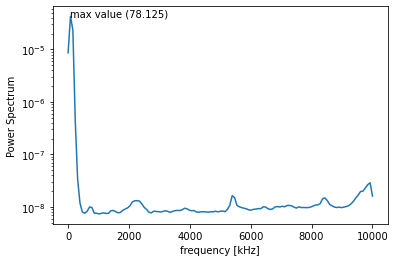


Velocity:  1.417131644
Max Frequency value:  156.25


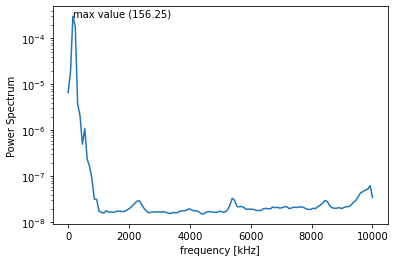


Velocity:  2.37252088
Max Frequency value:  312.5


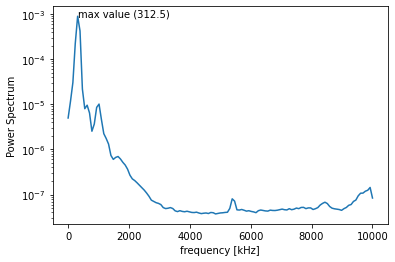


Velocity:  3.276742812
Max Frequency value:  468.75


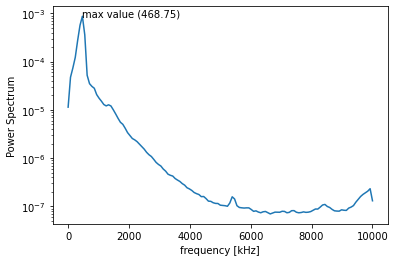


Velocity:  4.228705435999999
Max Frequency value:  625.0


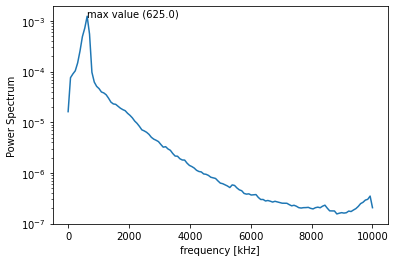


Velocity:  5.1598851
Max Frequency value:  781.25


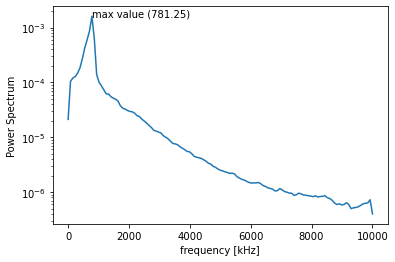


Velocity:  6.104977324
Max Frequency value:  937.5


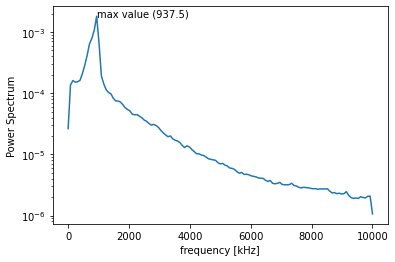


Velocity:  7.069650188000001
Max Frequency value:  1093.75


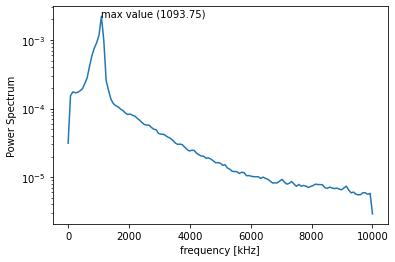


Velocity:  7.986341896
Max Frequency value:  1250.0


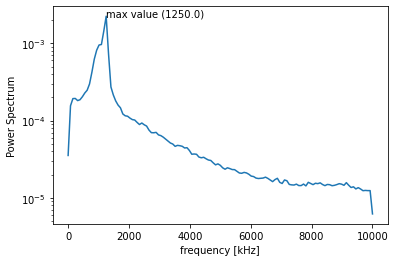


Velocity:  8.973412264
Max Frequency value:  1406.25


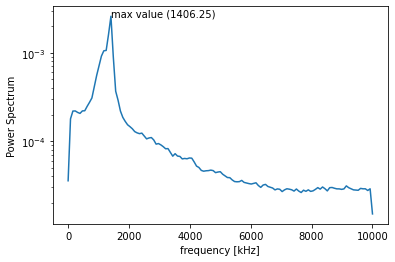


Velocity:  9.892980952
Max Frequency value:  1562.5


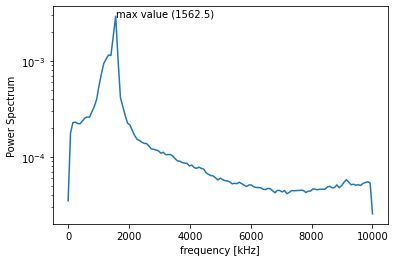


Velocity:  10.866439340000001
Max Frequency value:  1718.75


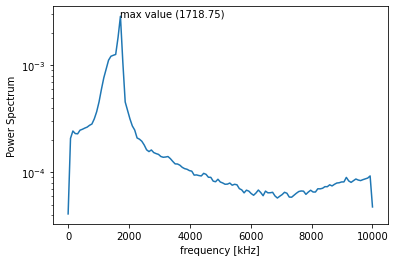


Velocity:  11.802376756000001
Max Frequency value:  1875.0


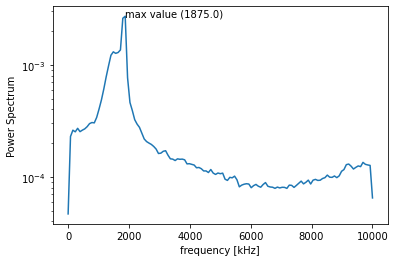


Velocity:  12.687541916
Max Frequency value:  2031.25


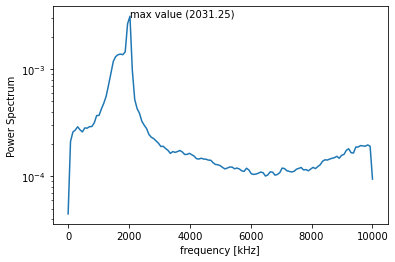


Velocity:  13.741469863999999
Max Frequency value:  2109.375


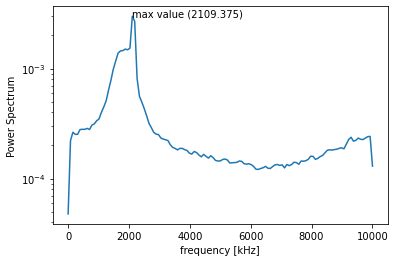


Velocity:  14.762540123999997
Max Frequency value:  2265.625


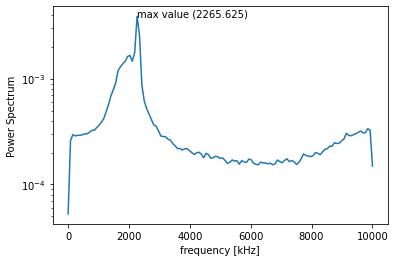

In [20]:
df6 = pd.read_csv(path_mat + dstream[5], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 6*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df6[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

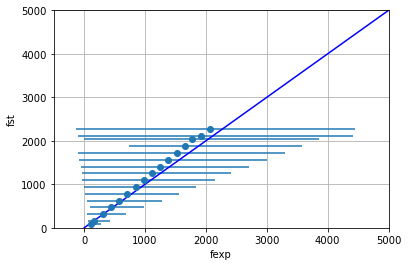

In [21]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y5

Velocity:  0.923330232
Max Frequency value:  78.125


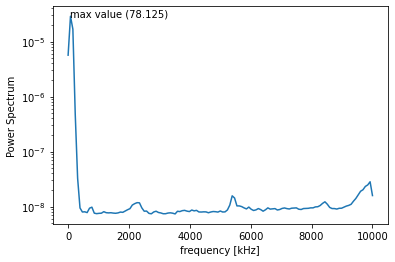


Velocity:  1.385021112
Max Frequency value:  156.25


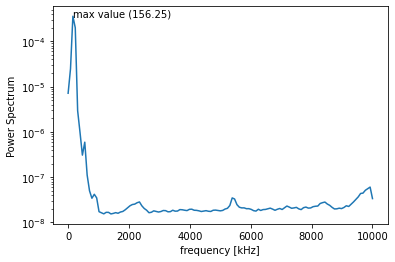


Velocity:  2.335910236
Max Frequency value:  312.5


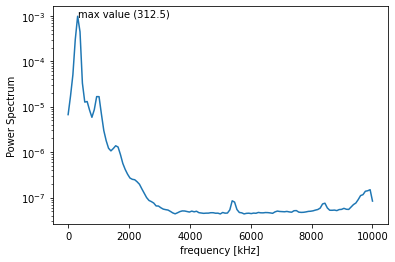


Velocity:  3.2849357640000005
Max Frequency value:  468.75


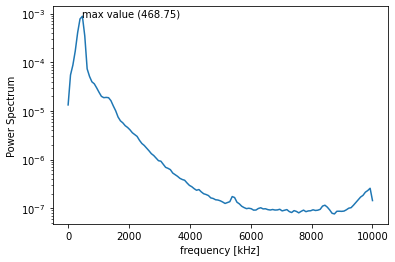


Velocity:  4.2307064400000005
Max Frequency value:  625.0


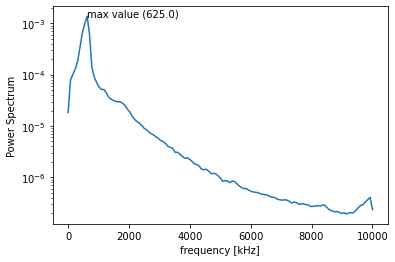


Velocity:  5.158227616
Max Frequency value:  781.25


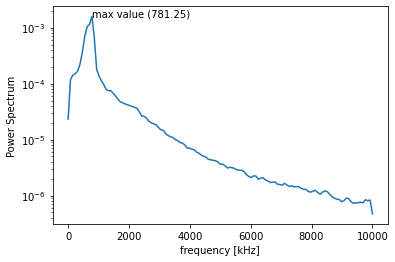


Velocity:  6.093469404
Max Frequency value:  937.5


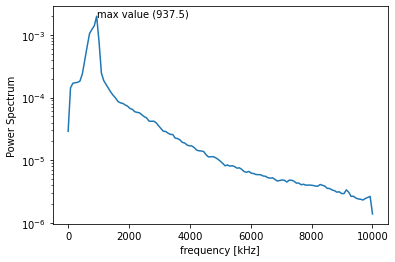


Velocity:  7.075575908
Max Frequency value:  1093.75


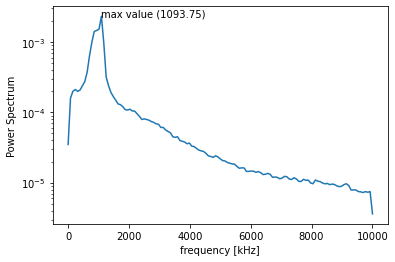


Velocity:  7.951637788
Max Frequency value:  1250.0


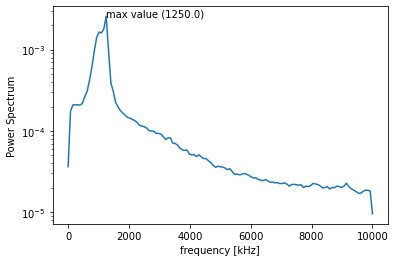


Velocity:  8.910530928
Max Frequency value:  1406.25


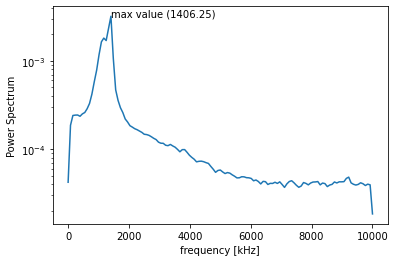


Velocity:  9.892843544
Max Frequency value:  1562.5


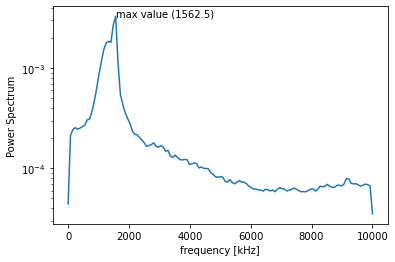


Velocity:  10.866087232
Max Frequency value:  1718.75


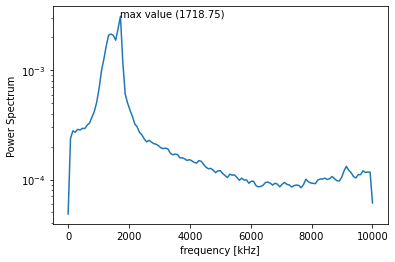


Velocity:  11.824954608
Max Frequency value:  1875.0


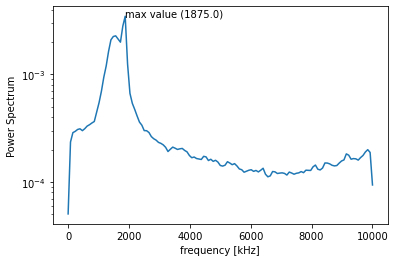


Velocity:  12.734690036000002
Max Frequency value:  1953.125


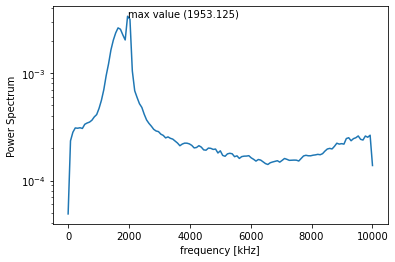


Velocity:  13.66037338
Max Frequency value:  2109.375


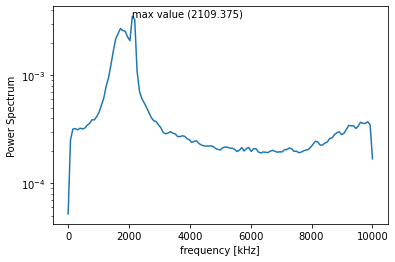


Velocity:  14.551859308000001
Max Frequency value:  2343.75


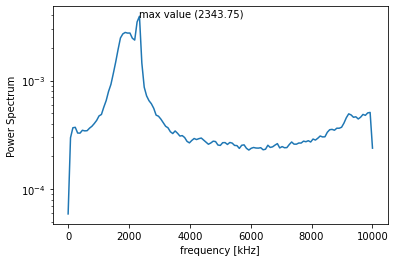

In [22]:
df7 = pd.read_csv(path_mat + dstream[6], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 7*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df7[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

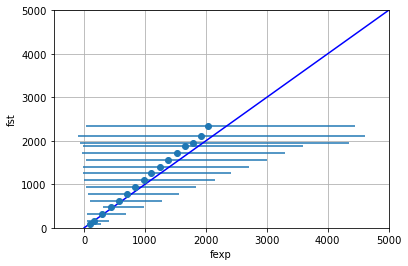

In [23]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y6

Velocity:  0.8970337760000001
Max Frequency value:  78.125


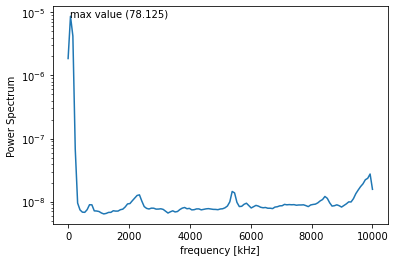


Velocity:  1.397370656
Max Frequency value:  156.25


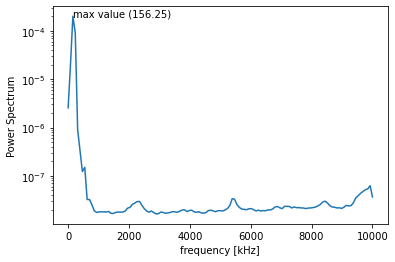


Velocity:  2.325140884
Max Frequency value:  312.5


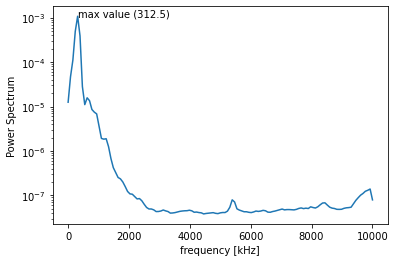


Velocity:  3.29195216
Max Frequency value:  390.625


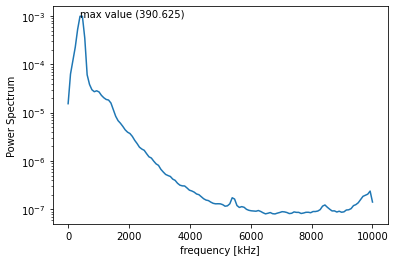


Velocity:  4.217979024
Max Frequency value:  625.0


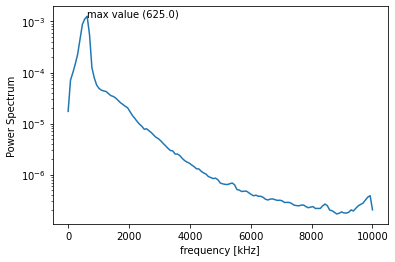


Velocity:  5.16585376
Max Frequency value:  781.25


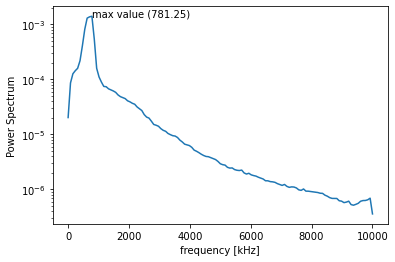


Velocity:  6.077014795999999
Max Frequency value:  937.5


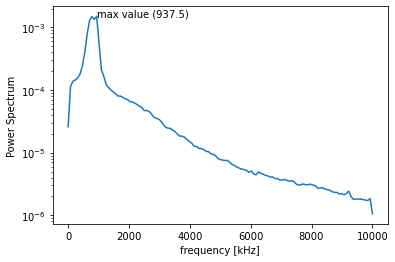


Velocity:  7.051623975999999
Max Frequency value:  937.5


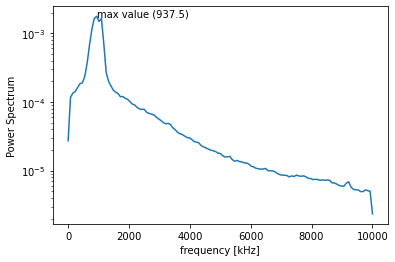


Velocity:  7.9584824240000005
Max Frequency value:  1250.0


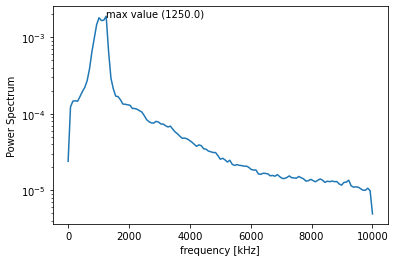


Velocity:  8.972132651999999
Max Frequency value:  1171.875


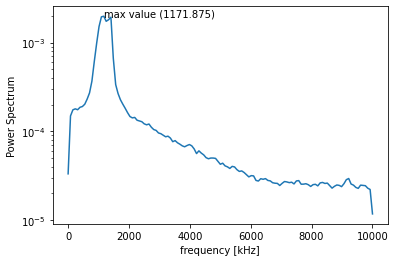


Velocity:  9.896356036
Max Frequency value:  1250.0


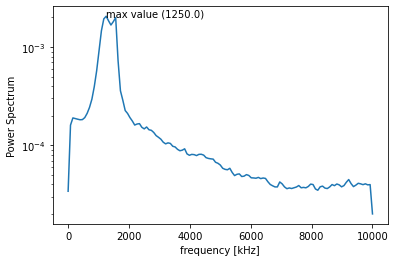


Velocity:  10.87202154
Max Frequency value:  1406.25


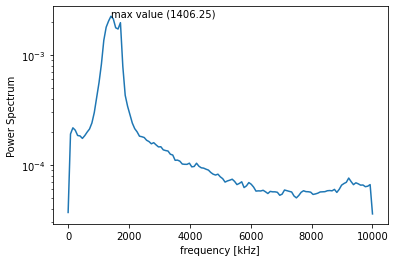


Velocity:  11.817405756000001
Max Frequency value:  1484.375


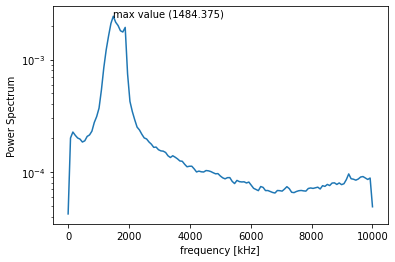


Velocity:  12.709106384
Max Frequency value:  1640.625


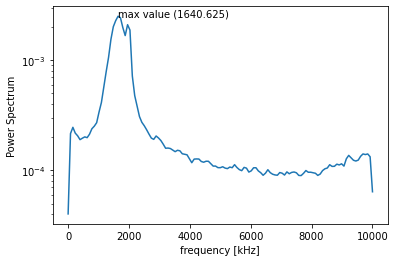


Velocity:  13.695558416
Max Frequency value:  1718.75


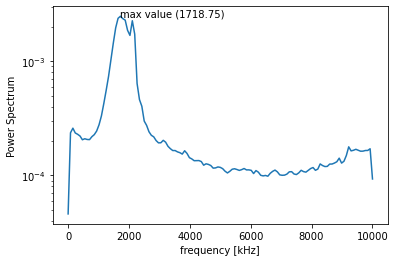


Velocity:  14.571147956
Max Frequency value:  1875.0


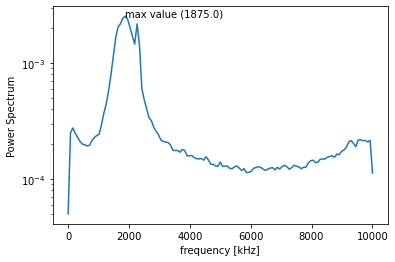

In [24]:
df8 = pd.read_csv(path_mat + dstream[7], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 8*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df8[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

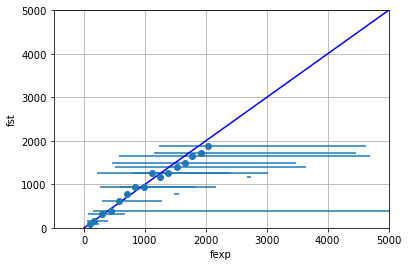

In [25]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y7

Velocity:  0.998595464
Max Frequency value:  78.125


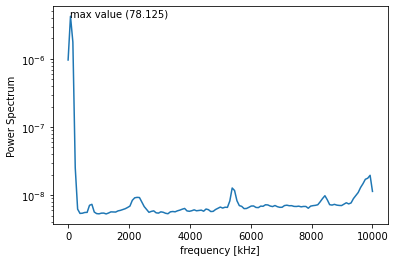


Velocity:  1.4015873639999998
Max Frequency value:  156.25


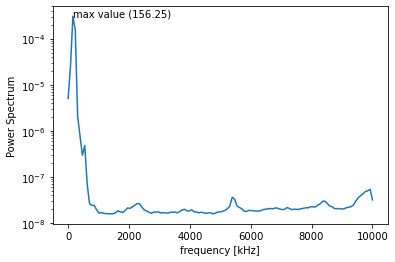


Velocity:  2.381117468
Max Frequency value:  312.5


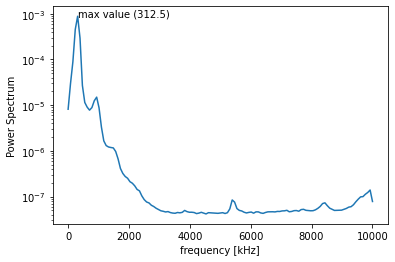


Velocity:  3.3048513359999996
Max Frequency value:  390.625


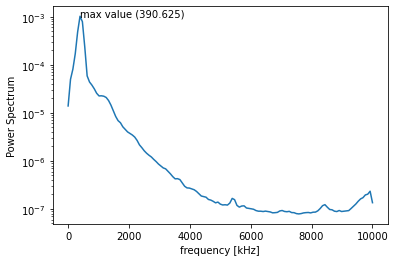


Velocity:  4.231608179999999
Max Frequency value:  546.875


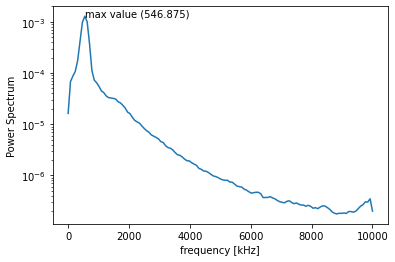


Velocity:  5.148918224000001
Max Frequency value:  625.0


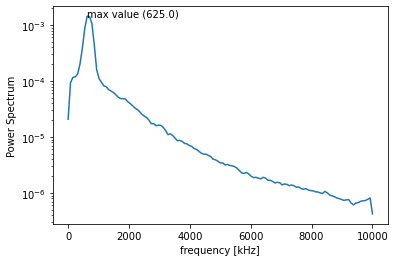


Velocity:  6.070152984
Max Frequency value:  781.25


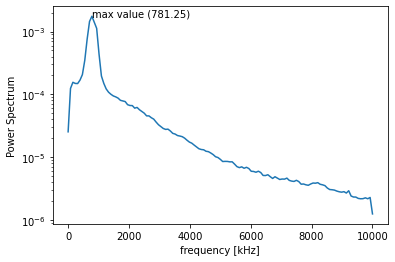


Velocity:  7.0862851440000005
Max Frequency value:  937.5


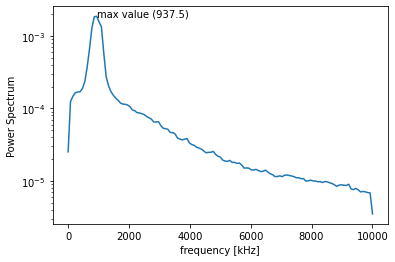


Velocity:  7.957580684000001
Max Frequency value:  1015.625


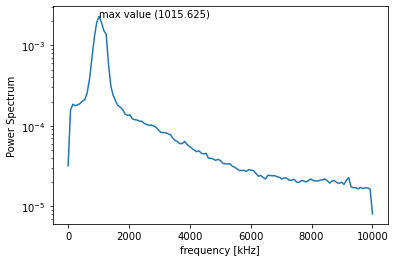


Velocity:  8.956717192
Max Frequency value:  1171.875


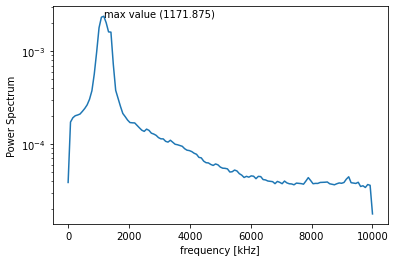


Velocity:  9.888188848
Max Frequency value:  1250.0


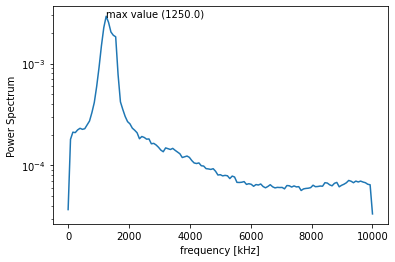


Velocity:  10.783273148000001
Max Frequency value:  1406.25


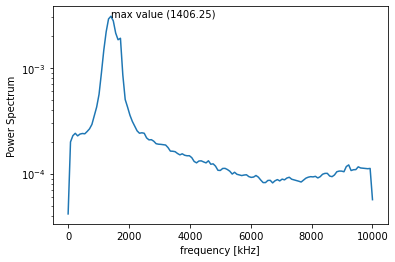


Velocity:  11.795377536000002
Max Frequency value:  1562.5


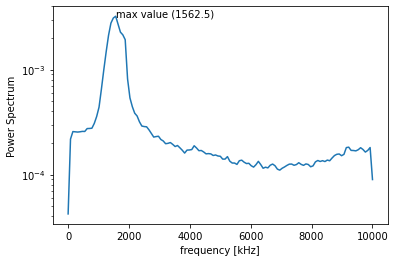


Velocity:  12.735720596000002
Max Frequency value:  1640.625


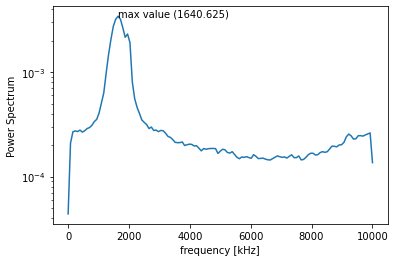


Velocity:  13.64658964
Max Frequency value:  1796.875


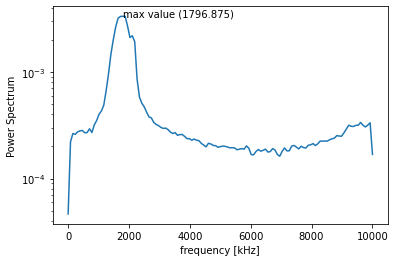


Velocity:  14.639594316000002
Max Frequency value:  1796.875


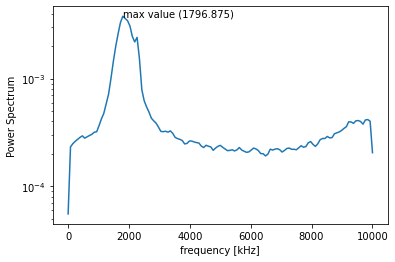

In [26]:
df9 = pd.read_csv(path_mat + dstream[8], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 9*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df9[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

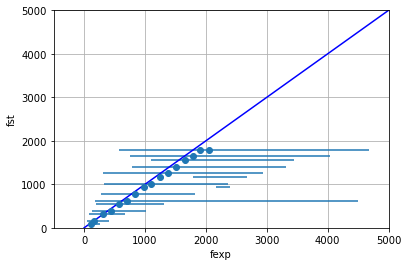

In [27]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y8

Velocity:  0.9242147960000001
Max Frequency value:  78.125


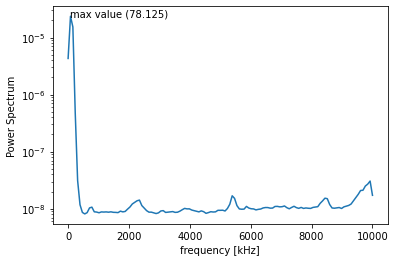


Velocity:  1.38296858
Max Frequency value:  156.25


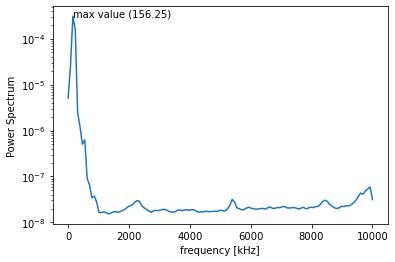


Velocity:  2.3362881079999998
Max Frequency value:  312.5


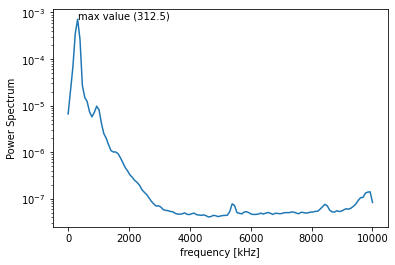


Velocity:  3.275557668
Max Frequency value:  390.625


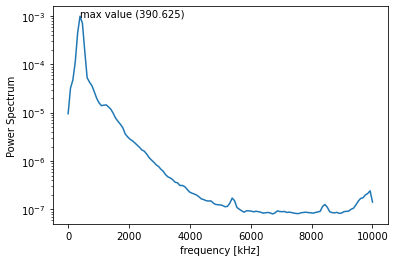


Velocity:  4.203946232000001
Max Frequency value:  546.875


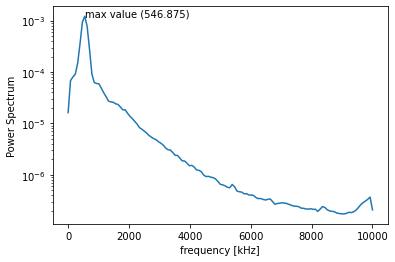


Velocity:  5.12501782
Max Frequency value:  625.0


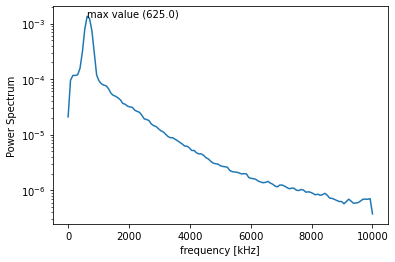


Velocity:  6.049850952
Max Frequency value:  781.25


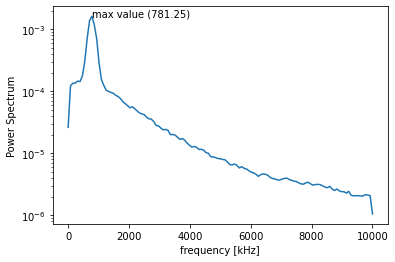


Velocity:  7.050215543999999
Max Frequency value:  937.5


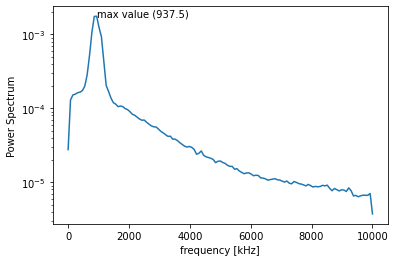


Velocity:  8.033189436
Max Frequency value:  1015.625


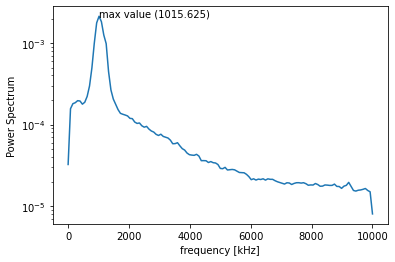


Velocity:  8.914653168000001
Max Frequency value:  1171.875


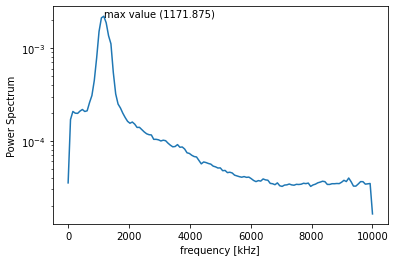


Velocity:  9.89376246
Max Frequency value:  1250.0


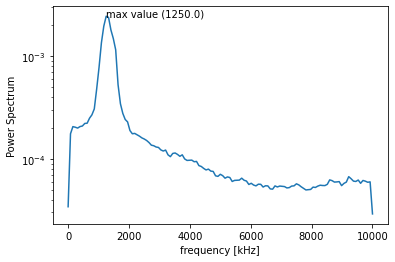


Velocity:  10.832310628
Max Frequency value:  1406.25


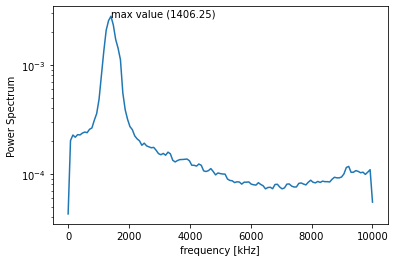


Velocity:  11.810002899999999
Max Frequency value:  1484.375


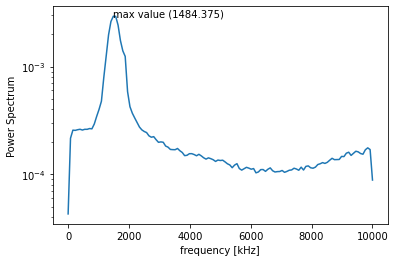


Velocity:  12.747700856000002
Max Frequency value:  1640.625


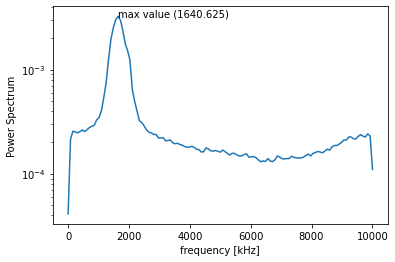


Velocity:  13.667269544
Max Frequency value:  1718.75


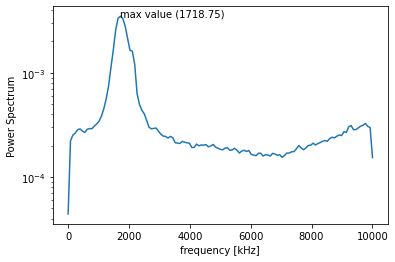


Velocity:  14.690486803999997
Max Frequency value:  1796.875


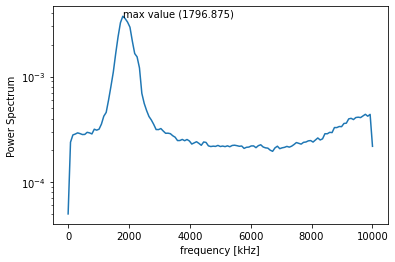

In [28]:
df10 = pd.read_csv(path_mat + dstream[9], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 10*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df10[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

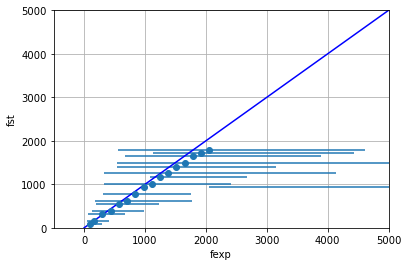

In [29]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y9

Velocity:  0.9152489239999999
Max Frequency value:  78.125


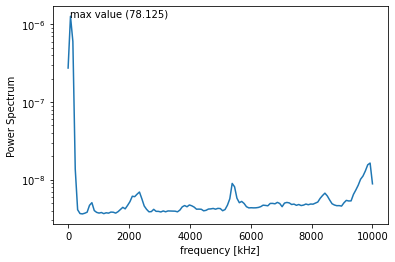


Velocity:  1.400170344
Max Frequency value:  156.25


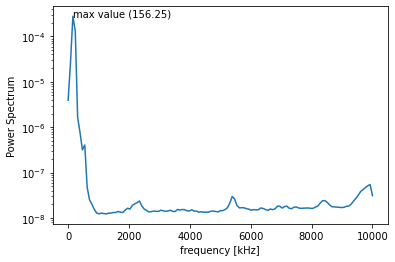


Velocity:  2.375157396
Max Frequency value:  312.5


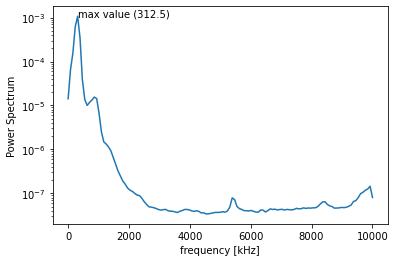


Velocity:  3.3181885
Max Frequency value:  390.625


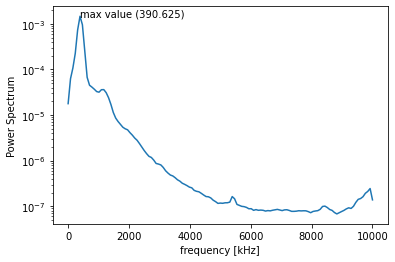


Velocity:  4.207441548
Max Frequency value:  546.875


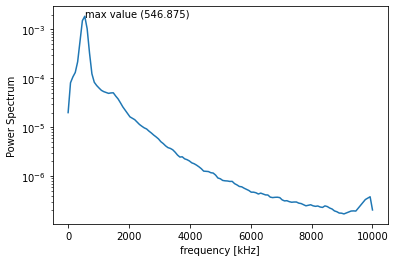


Velocity:  5.14339614
Max Frequency value:  625.0


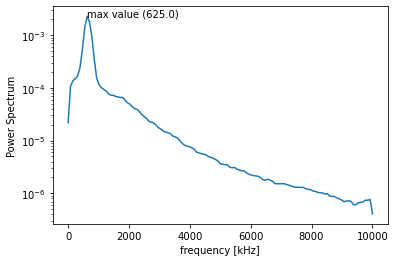


Velocity:  6.13470898
Max Frequency value:  781.25


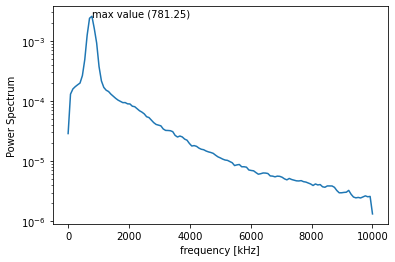


Velocity:  7.09093984
Max Frequency value:  859.375


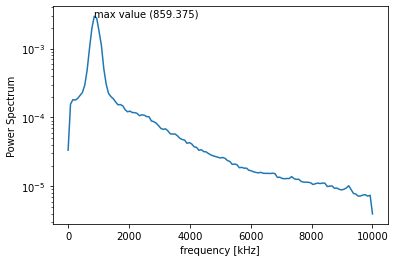


Velocity:  7.954798171999999
Max Frequency value:  1015.625


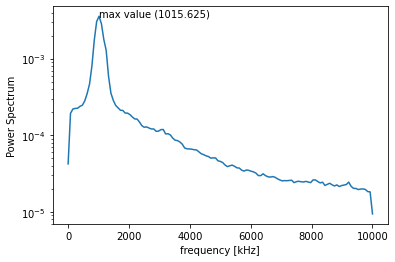


Velocity:  8.979372335999999
Max Frequency value:  1171.875


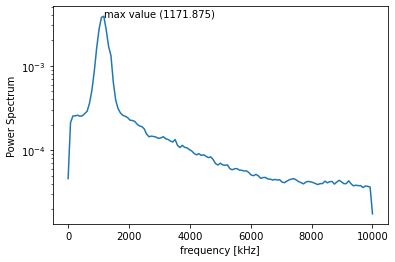


Velocity:  9.928844439999999
Max Frequency value:  1250.0


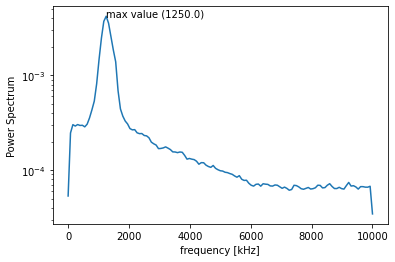


Velocity:  10.785025099999999
Max Frequency value:  1406.25


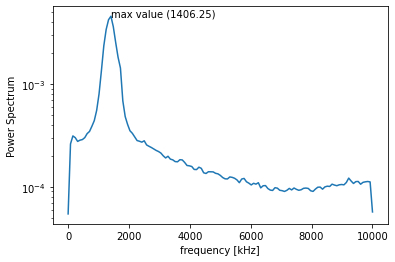


Velocity:  11.784745592
Max Frequency value:  1484.375


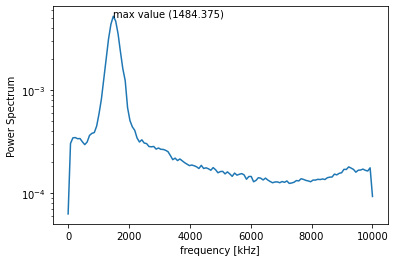


Velocity:  12.697658579999999
Max Frequency value:  1640.625


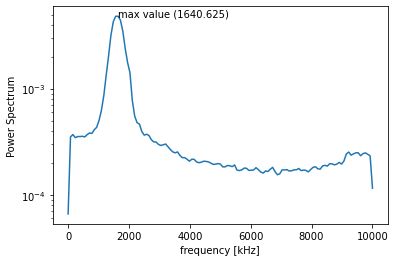


Velocity:  13.648375944
Max Frequency value:  1640.625


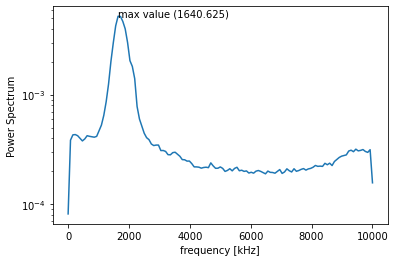


Velocity:  14.587001403999999
Max Frequency value:  1875.0


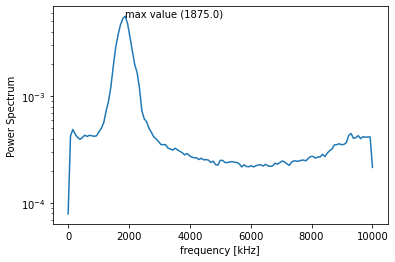

In [30]:
df11 = pd.read_csv(path_mat + dstream[10], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 11*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df11[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

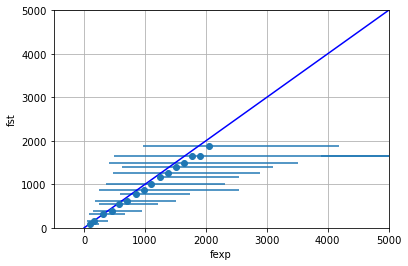

In [31]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

# Upstream

#### Velocidades UpStream

In [32]:
velocity = pd.read_csv(path_mat + ustream[0])
velocity.head()

PVDF peak  mA  PVDF peak V  PVDF peak power  n/a  Solar mA 1  Solar V 1  \
0        0.00007          0.0              0.0  0.0         inf    0.00125   
1        0.00007          0.0              0.0  0.0         inf    0.00126   
2        0.00007          0.0              0.0  0.0         inf    0.00125   
3        0.00007          0.0              0.0  0.0         inf    0.00125   
4        0.00007          0.0              0.0  0.0         inf    0.00124   

   solar mW 1  tunnel P  tunnel V      Patm  Tatm  num of 470k  Solar mA 2  \
0         inf   0.73339   1.10871  100392.0  20.0          0.0         inf   
1         inf   1.65448   1.66526  100392.0  20.0          0.0         inf   
2         inf   4.59329   2.77468  100392.0  20.0          0.0         inf   
3         inf   8.74997   3.82961  100392.0  20.0          0.0         inf   
4         inf  14.61771   4.94984  100392.0  20.0          0.0         inf   

   Solar V 2  Solar mW 2  
0    0.00128         inf  
1    0.00126         inf  
2    0.00127         inf  
3    0.00126         inf  
4    0.00126         inf

In [33]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.describe()

tunnel V
count  208.000000
mean     7.569968
std      4.308229
min      0.914656
25%      3.935097
50%      7.517051
75%     11.113516
max     14.687653

In [34]:
df_prueba = pd.read_csv(path_mat + ustream[1])
df_prueba.describe()

0.68092
count  1.599999e+06
mean   7.887688e+00
std    4.722396e+00
min    5.836300e-01
25%    3.752010e+00
50%    7.773840e+00
75%    1.184372e+01
max    2.356432e+01

## Graficas Upstream

## y-2

Velocity:  0.952160148
Max Frequency value:  78.125


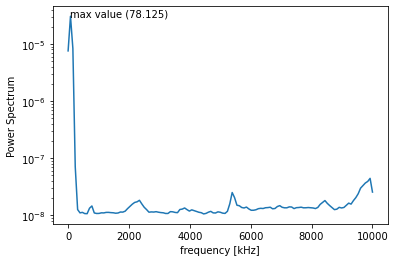


Velocity:  1.430125288
Max Frequency value:  156.25


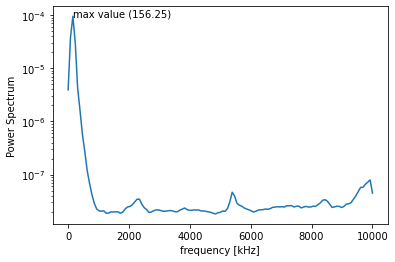


Velocity:  2.382895184
Max Frequency value:  312.5


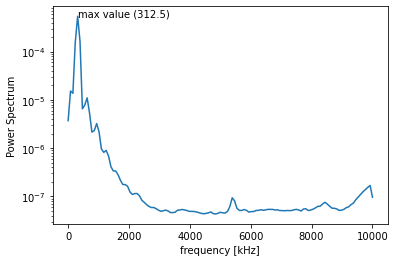


Velocity:  3.288869068
Max Frequency value:  468.75


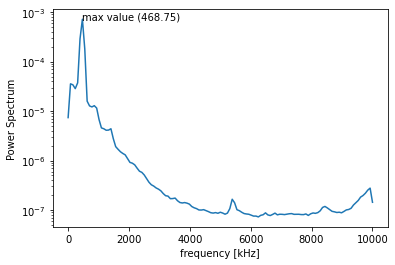


Velocity:  4.250922592
Max Frequency value:  625.0


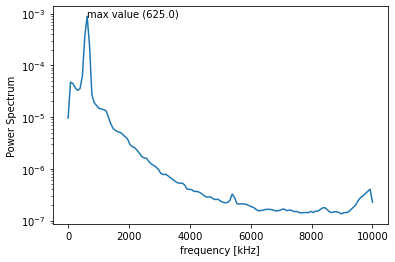


Velocity:  5.158012916
Max Frequency value:  781.25


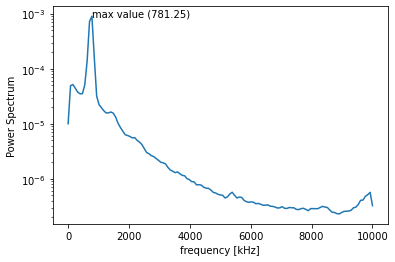


Velocity:  6.081214328000001
Max Frequency value:  859.375


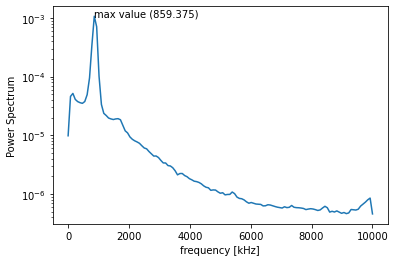


Velocity:  7.060203388
Max Frequency value:  1015.625


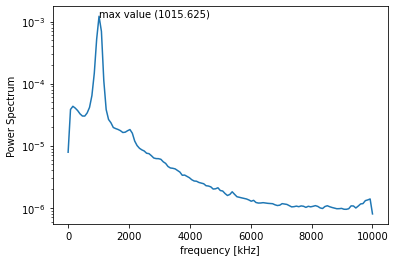


Velocity:  7.970505623999999
Max Frequency value:  1171.875


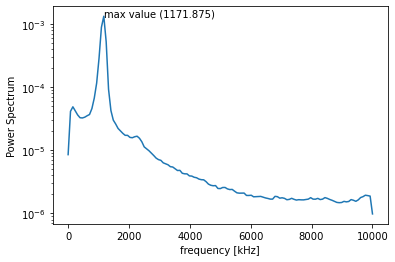


Velocity:  8.937986764
Max Frequency value:  1328.125


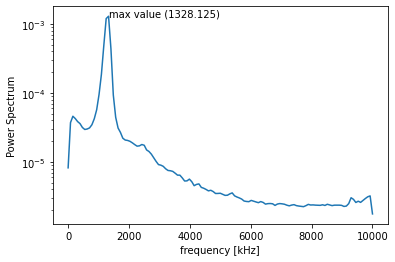


Velocity:  9.89878644
Max Frequency value:  1406.25


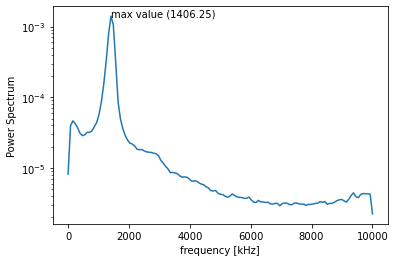


Velocity:  10.844016071999999
Max Frequency value:  1562.5


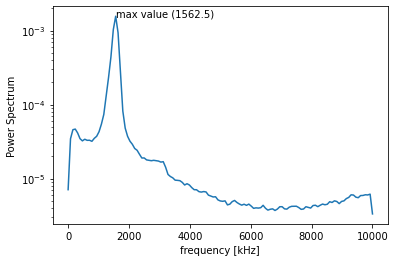


Velocity:  11.71330202
Max Frequency value:  1640.625


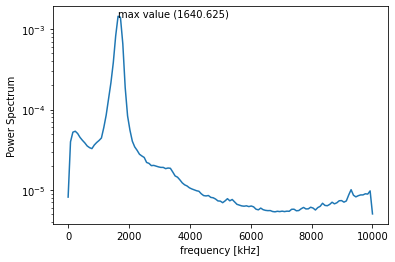


Velocity:  12.671233304
Max Frequency value:  1796.875


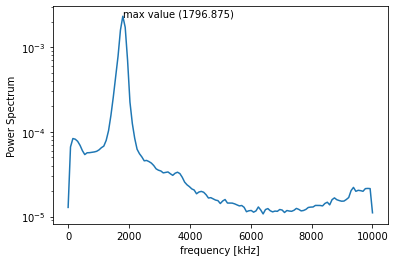


Velocity:  13.659205412
Max Frequency value:  1953.125


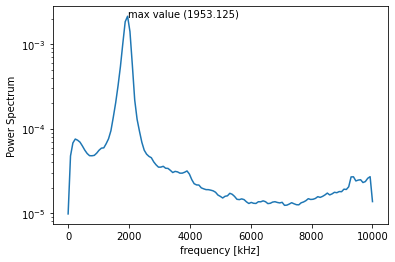


Velocity:  14.665229496000002
Max Frequency value:  2109.375


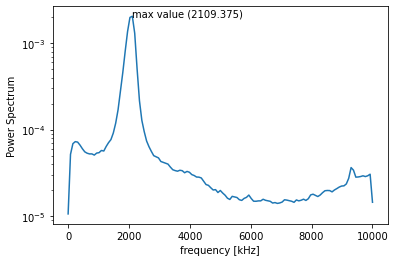

In [35]:
df = pd.read_csv(path_mat + ustream[-1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

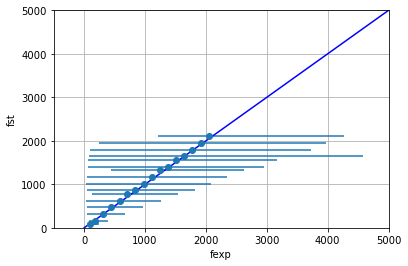

In [36]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



## y-1

Velocity:  0.936658808
Max Frequency value:  78.125


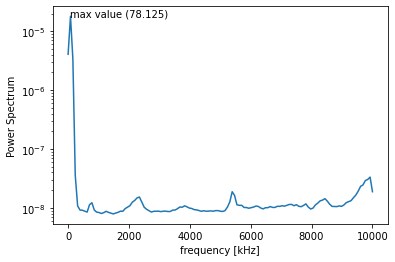


Velocity:  1.41878054
Max Frequency value:  78.125


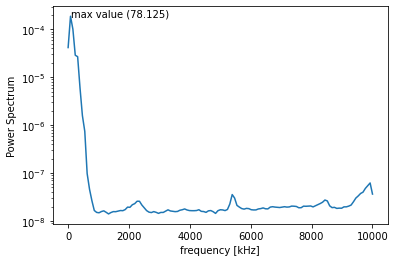


Velocity:  2.3705198760000004
Max Frequency value:  312.5


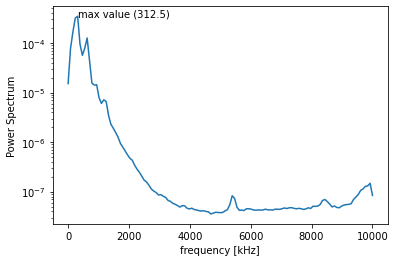


Velocity:  3.31569798
Max Frequency value:  312.5


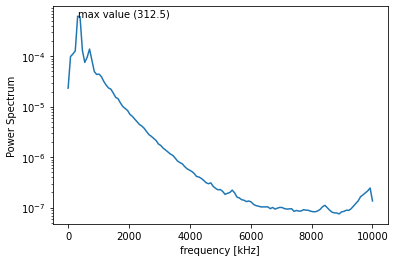


Velocity:  4.30142862
Max Frequency value:  546.875


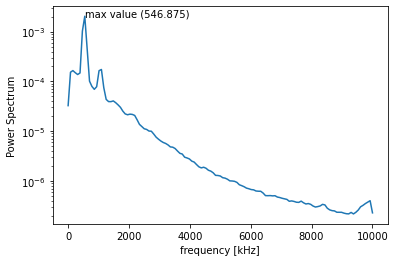


Velocity:  5.214315844
Max Frequency value:  625.0


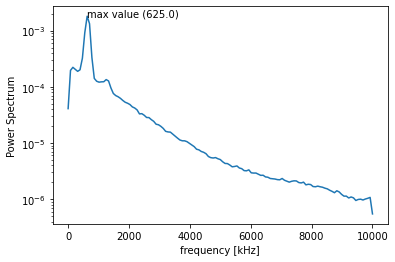


Velocity:  6.094259500000001
Max Frequency value:  703.125


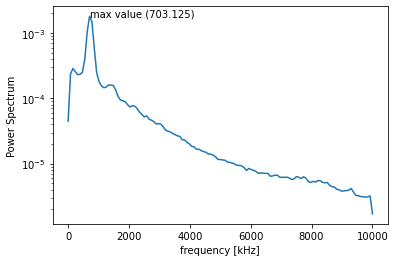


Velocity:  7.049013224000001
Max Frequency value:  859.375


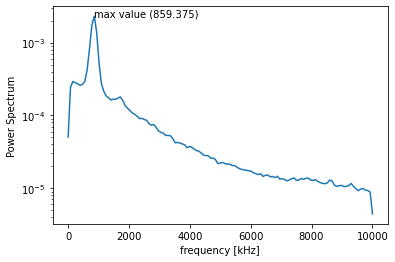


Velocity:  7.962776424000001
Max Frequency value:  937.5


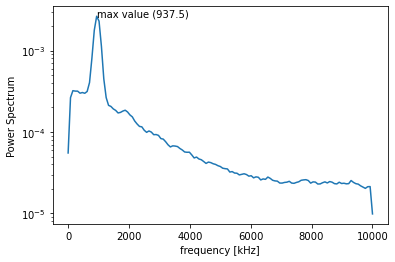


Velocity:  8.919264924
Max Frequency value:  1093.75


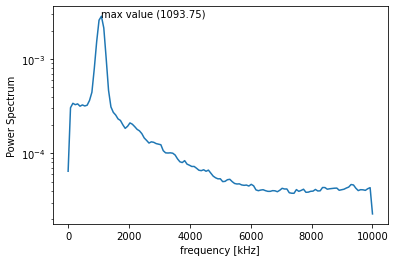


Velocity:  9.88422978
Max Frequency value:  1250.0


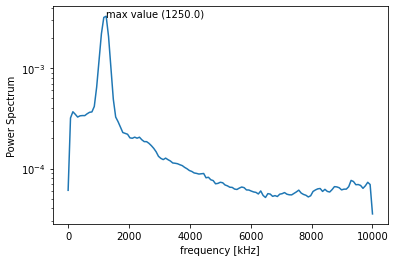


Velocity:  10.840228764
Max Frequency value:  1328.125


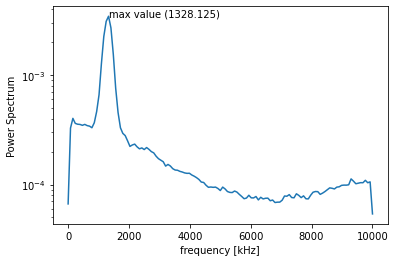


Velocity:  11.795763996000002
Max Frequency value:  1406.25


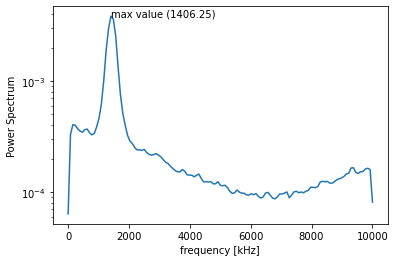


Velocity:  12.735566012
Max Frequency value:  1562.5


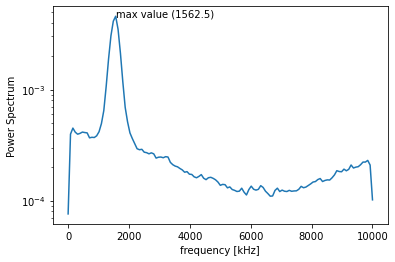


Velocity:  13.621280803999998
Max Frequency value:  1640.625


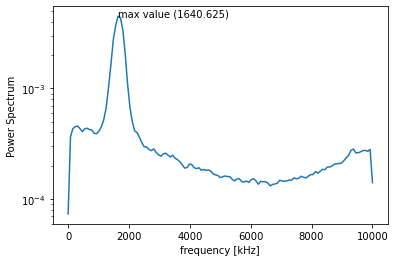


Velocity:  14.66091832
Max Frequency value:  1796.875


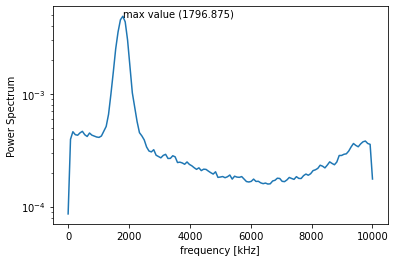

In [37]:
df1 = pd.read_csv(path_mat + ustream[-2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

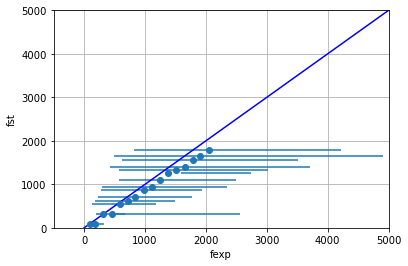

In [38]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y0

Velocity:  0.914656352
Max Frequency value:  78.125


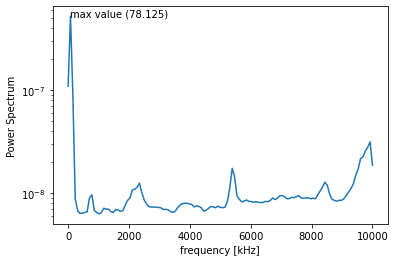


Velocity:  1.4091104520000002
Max Frequency value:  78.125


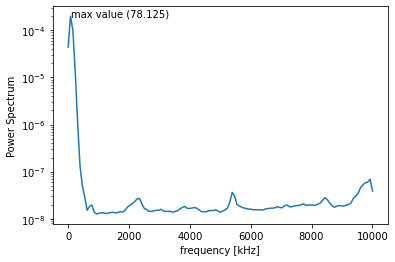


Velocity:  2.3977781879999998
Max Frequency value:  156.25


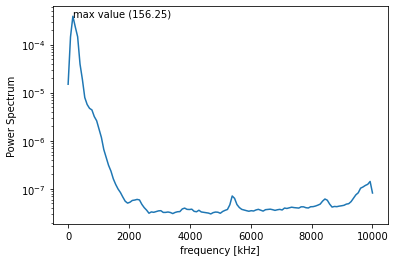


Velocity:  3.30728174
Max Frequency value:  312.5


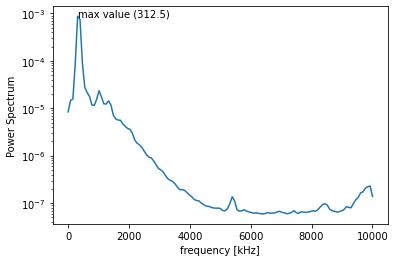


Velocity:  4.226171976
Max Frequency value:  546.875


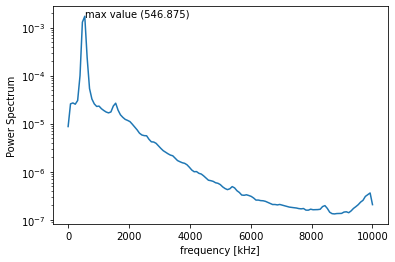


Velocity:  5.145766428
Max Frequency value:  625.0


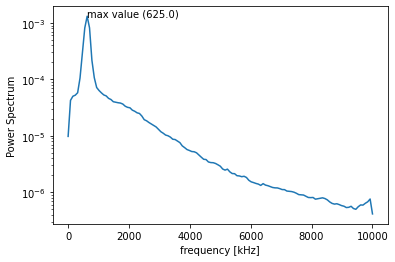


Velocity:  6.148269432
Max Frequency value:  703.125


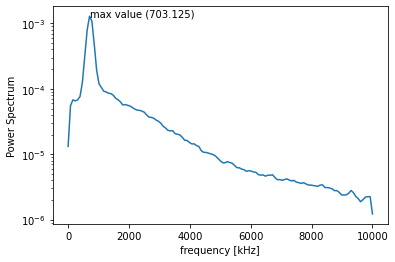


Velocity:  7.073351615999999
Max Frequency value:  859.375


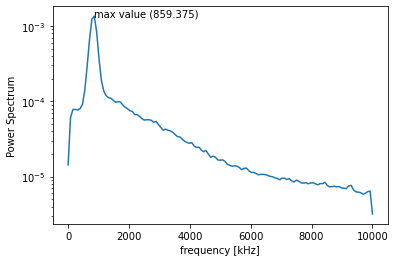


Velocity:  7.951551908
Max Frequency value:  937.5


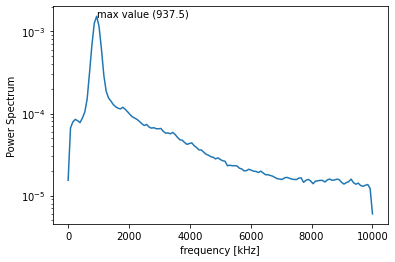


Velocity:  8.9437579
Max Frequency value:  1093.75


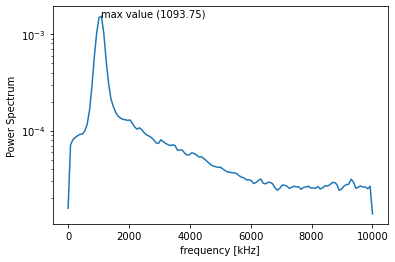


Velocity:  9.873812536
Max Frequency value:  1171.875


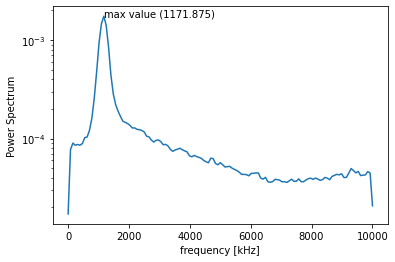


Velocity:  10.815589792
Max Frequency value:  1328.125


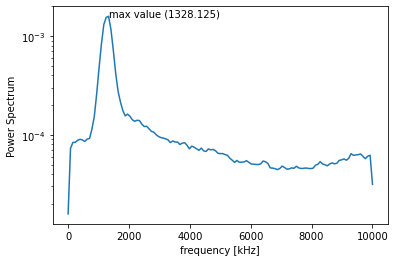


Velocity:  11.820514612
Max Frequency value:  1406.25


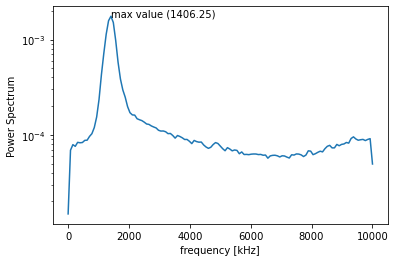


Velocity:  12.704881088
Max Frequency value:  1484.375


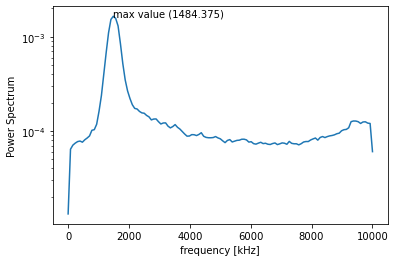


Velocity:  13.629465168
Max Frequency value:  1562.5


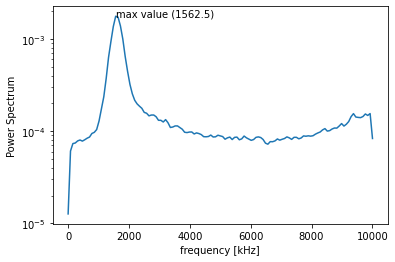


Velocity:  14.665959476000001
Max Frequency value:  1718.75


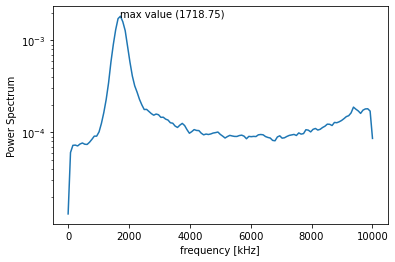

In [39]:
df2 = pd.read_csv(path_mat + ustream[1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 2*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df2[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

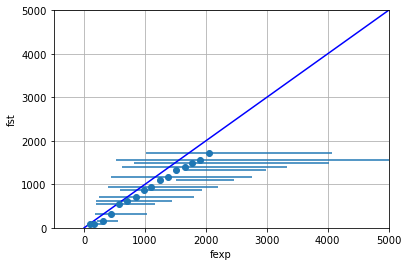

In [40]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y1

Velocity:  0.9871820119999999
Max Frequency value:  78.125


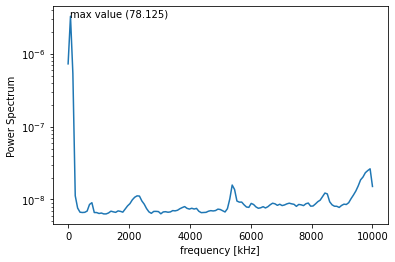


Velocity:  1.399680828
Max Frequency value:  78.125


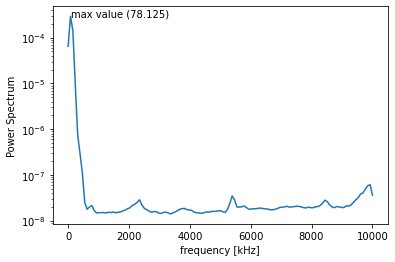


Velocity:  2.3303623879999997
Max Frequency value:  156.25


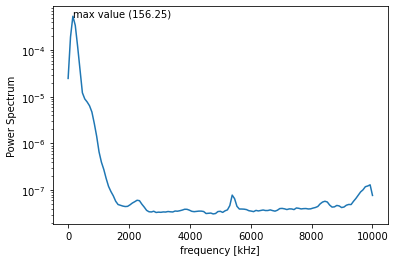


Velocity:  3.3131816959999996
Max Frequency value:  312.5


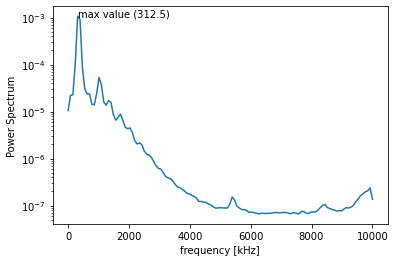


Velocity:  4.249144876
Max Frequency value:  546.875


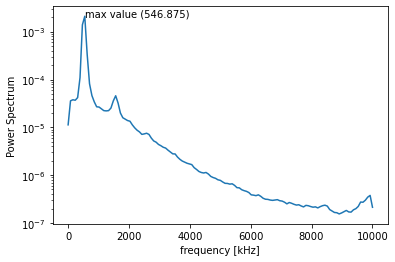


Velocity:  5.142743452
Max Frequency value:  625.0


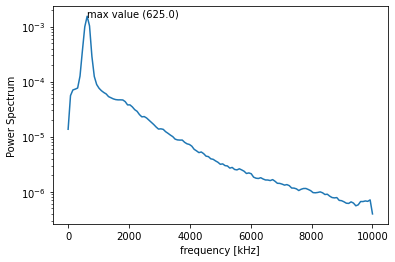


Velocity:  6.121217231999999
Max Frequency value:  703.125


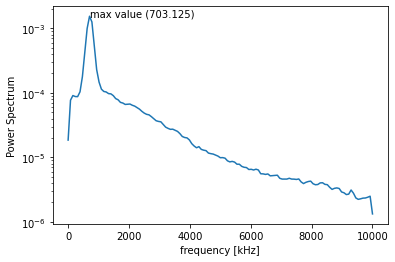


Velocity:  7.088397792
Max Frequency value:  859.375


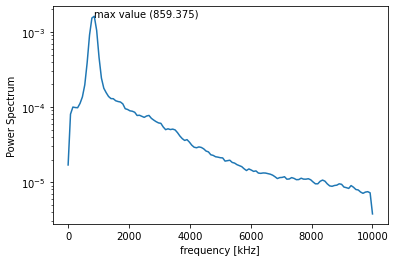


Velocity:  8.03166936
Max Frequency value:  937.5


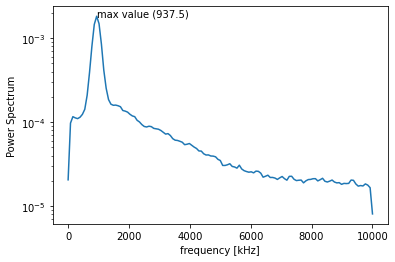


Velocity:  8.951384044000001
Max Frequency value:  1093.75


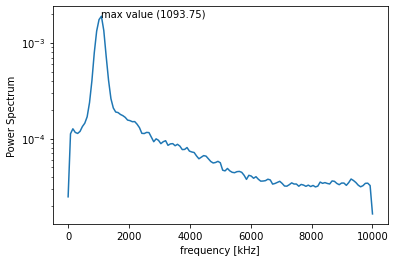


Velocity:  9.887372988000001
Max Frequency value:  1171.875


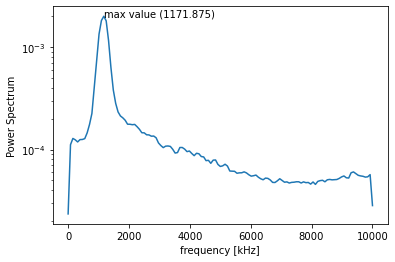


Velocity:  10.882163968
Max Frequency value:  1250.0


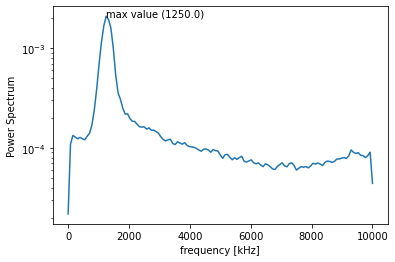


Velocity:  11.82979824
Max Frequency value:  1406.25


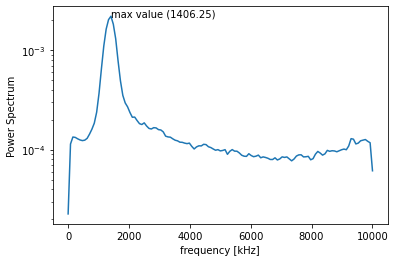


Velocity:  12.692368372
Max Frequency value:  1484.375


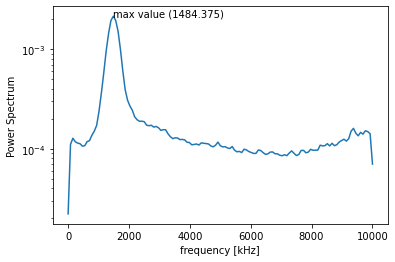


Velocity:  13.698297988000002
Max Frequency value:  1562.5


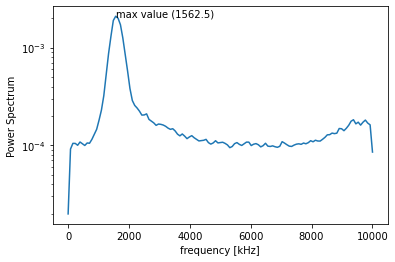


Velocity:  14.639817604
Max Frequency value:  1718.75


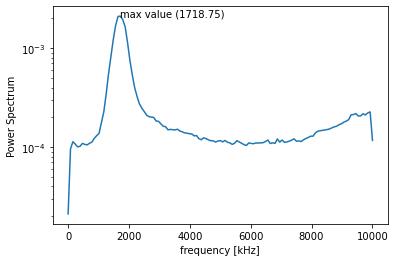

In [41]:
df3 = pd.read_csv(path_mat + ustream[2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 3*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df3[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

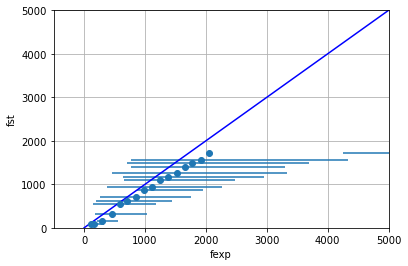

In [42]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

Velocity:  0.9800110320000001
Max Frequency value:  9921.875


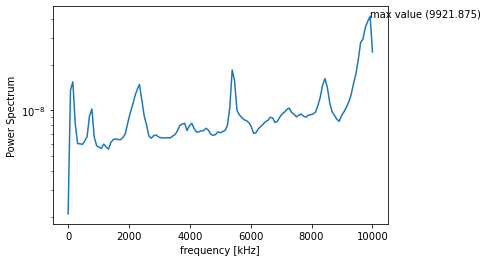


Velocity:  1.424852256
Max Frequency value:  9921.875


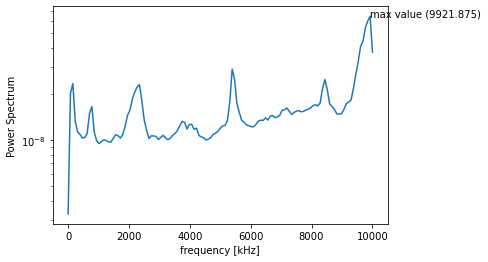


Velocity:  2.31515304
Max Frequency value:  9921.875


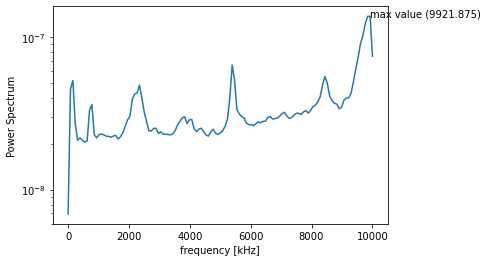


Velocity:  3.287469224
Max Frequency value:  312.5


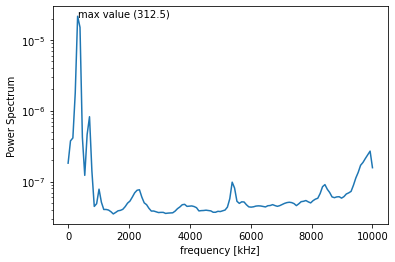


Velocity:  4.241115096
Max Frequency value:  468.75


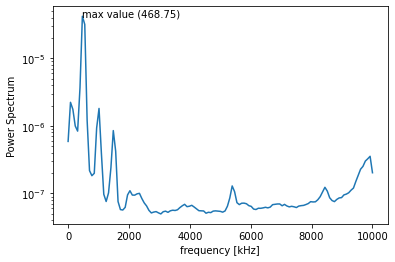


Velocity:  5.146281708
Max Frequency value:  703.125


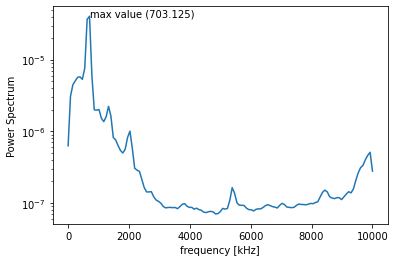


Velocity:  6.119370812
Max Frequency value:  781.25


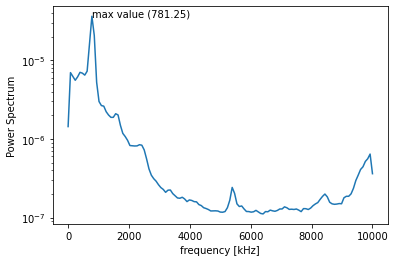


Velocity:  7.073583492
Max Frequency value:  937.5


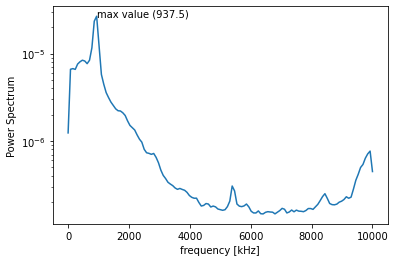


Velocity:  7.9441919919999995
Max Frequency value:  1015.625


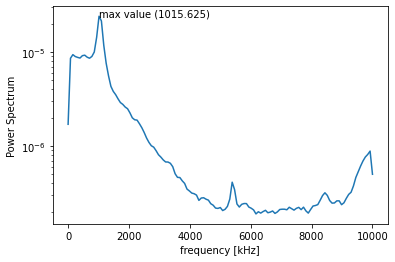


Velocity:  8.9310906
Max Frequency value:  1171.875


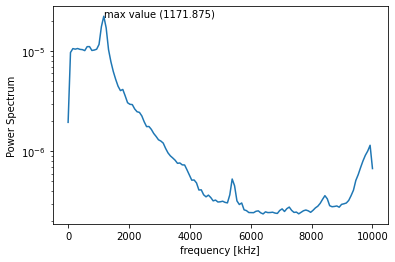


Velocity:  9.910079660000001
Max Frequency value:  1328.125


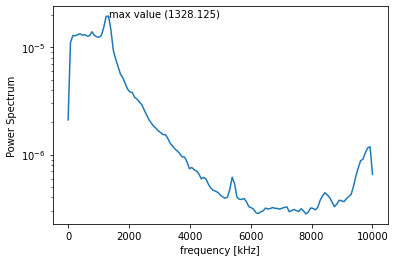


Velocity:  10.871308736
Max Frequency value:  1406.25


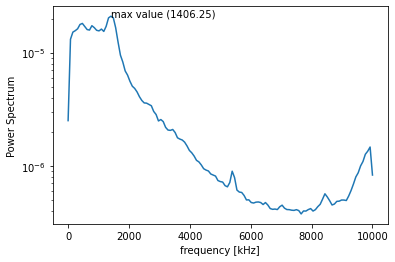


Velocity:  11.765671644
Max Frequency value:  1562.5


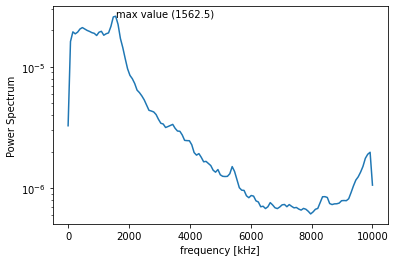


Velocity:  12.741723608000001
Max Frequency value:  1562.5


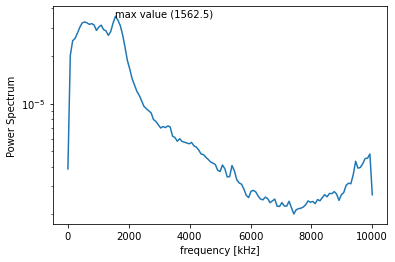


Velocity:  13.616110828
Max Frequency value:  1718.75


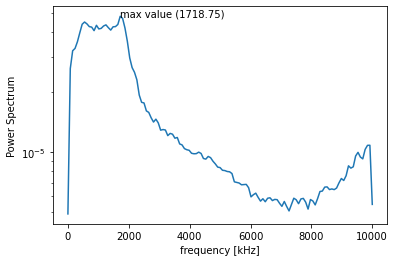


Velocity:  14.582930692
Max Frequency value:  1875.0


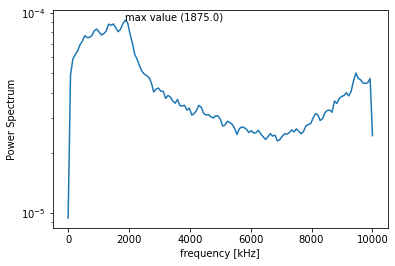

In [43]:
df4 = pd.read_csv(path_mat + ustream[3], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 4*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df4[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

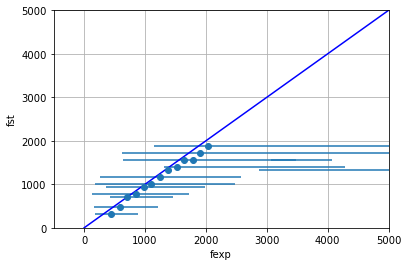

In [44]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y3

Velocity:  0.9531563560000001
Max Frequency value:  78.125


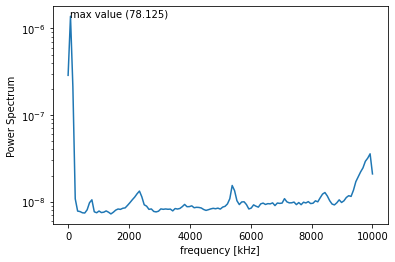


Velocity:  1.39555
Max Frequency value:  78.125


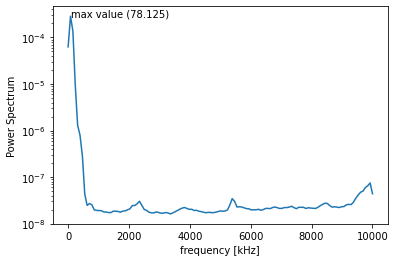


Velocity:  2.378764356
Max Frequency value:  156.25


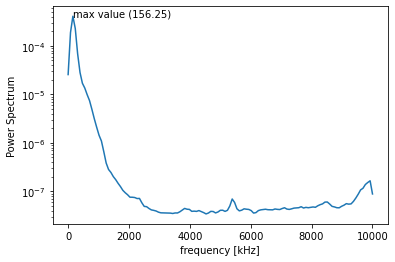


Velocity:  3.300076408
Max Frequency value:  312.5


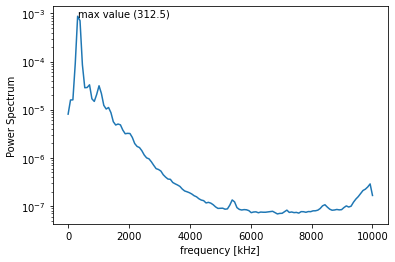


Velocity:  4.238126472
Max Frequency value:  546.875


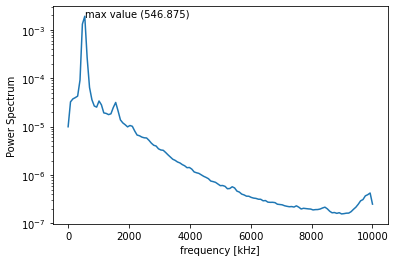


Velocity:  5.225291308
Max Frequency value:  625.0


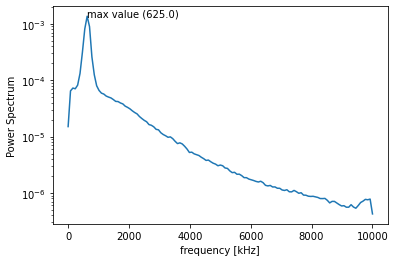


Velocity:  6.07497944
Max Frequency value:  703.125


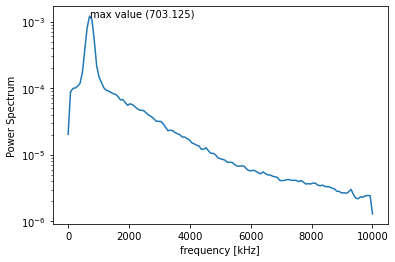


Velocity:  7.069478428000001
Max Frequency value:  859.375


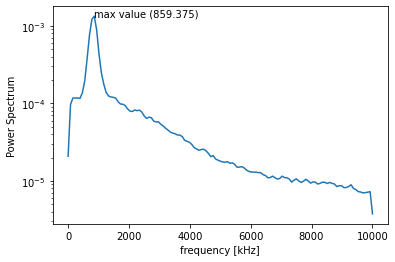


Velocity:  8.04927476
Max Frequency value:  937.5


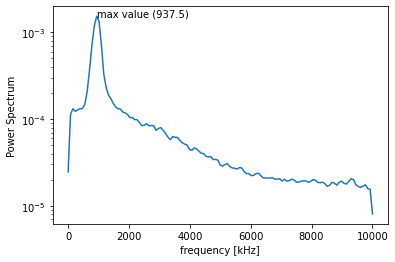


Velocity:  8.91932504
Max Frequency value:  1093.75


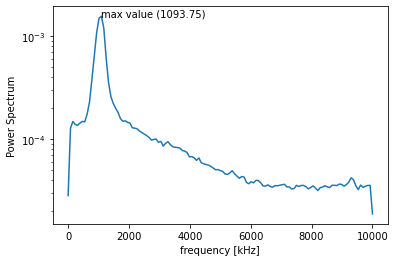


Velocity:  9.879102744
Max Frequency value:  1171.875


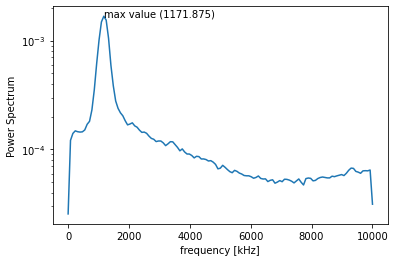


Velocity:  10.870913688
Max Frequency value:  1250.0


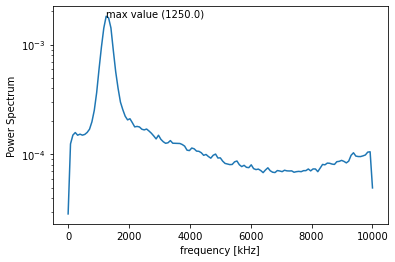


Velocity:  11.798632388
Max Frequency value:  1406.25


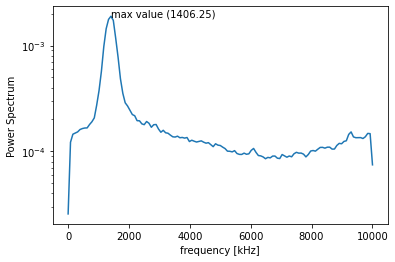


Velocity:  12.723740336
Max Frequency value:  1484.375


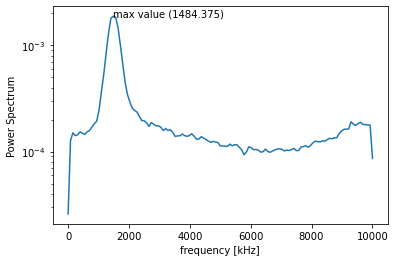


Velocity:  13.663748464
Max Frequency value:  1640.625


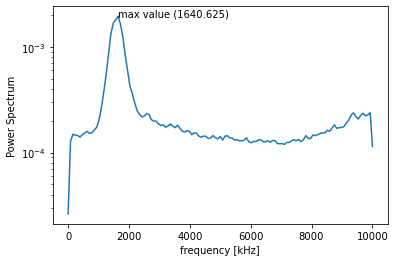


Velocity:  14.687652764
Max Frequency value:  1718.75


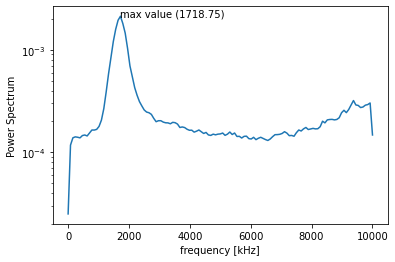

In [45]:
df5 = pd.read_csv(path_mat + ustream[4], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 5*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df5[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

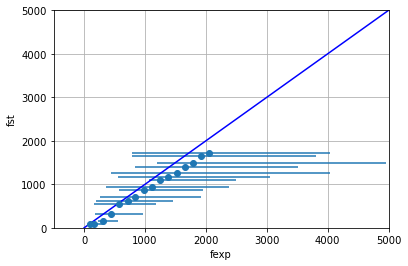

In [46]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y4

Velocity:  0.9961736480000001
Max Frequency value:  78.125


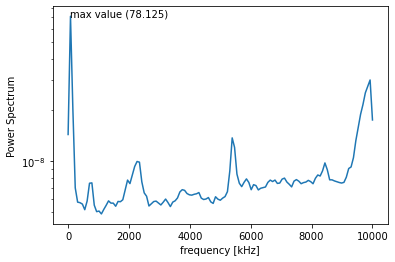


Velocity:  1.367604648
Max Frequency value:  78.125


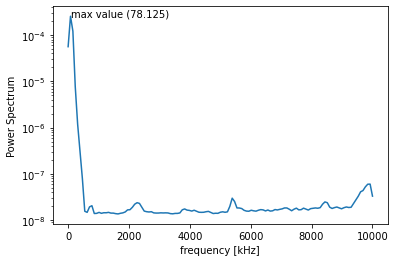


Velocity:  2.328275504
Max Frequency value:  156.25


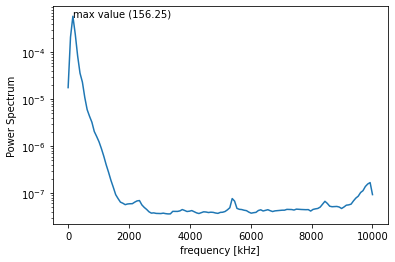


Velocity:  3.2937985800000003
Max Frequency value:  312.5


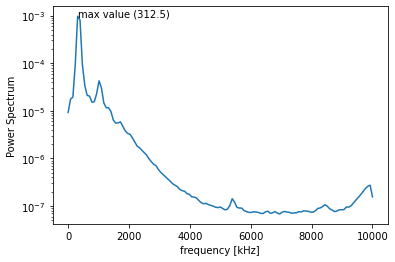


Velocity:  4.195478464000001
Max Frequency value:  546.875


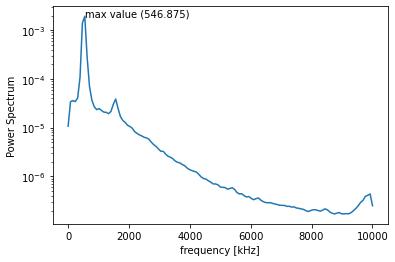


Velocity:  5.136104928
Max Frequency value:  625.0


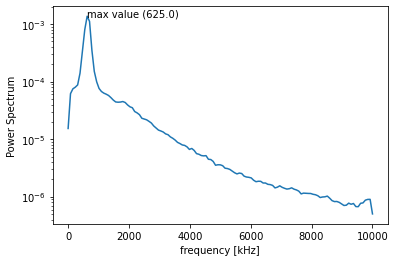


Velocity:  6.158918551999999
Max Frequency value:  703.125


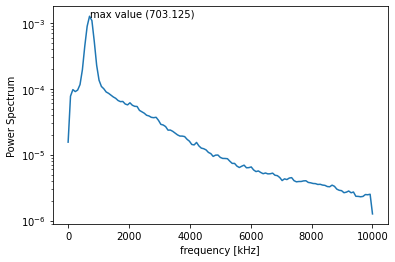


Velocity:  7.024494484
Max Frequency value:  859.375


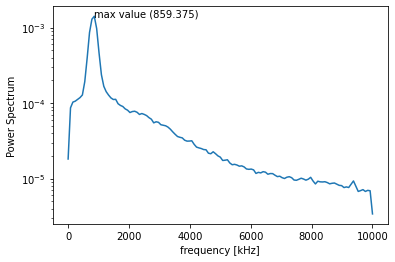


Velocity:  7.964571316
Max Frequency value:  937.5


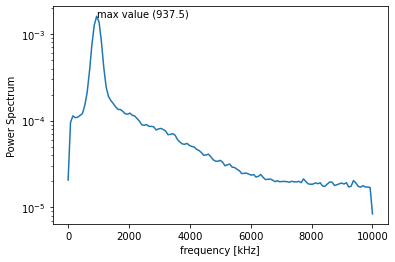


Velocity:  8.977603208000001
Max Frequency value:  1093.75


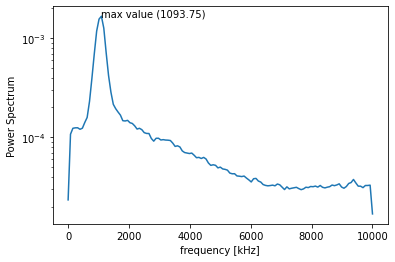


Velocity:  9.921656284
Max Frequency value:  1171.875


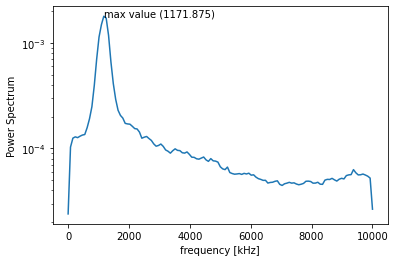


Velocity:  10.884096268
Max Frequency value:  1250.0


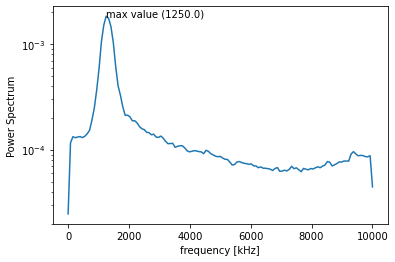


Velocity:  11.787622572
Max Frequency value:  1406.25


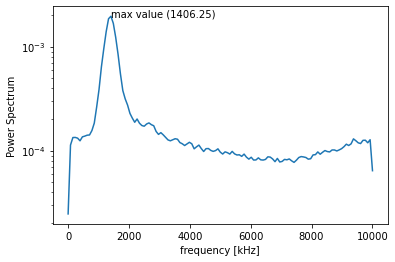


Velocity:  12.75880514
Max Frequency value:  1484.375


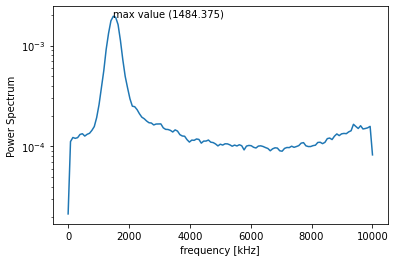


Velocity:  13.618670052
Max Frequency value:  1640.625


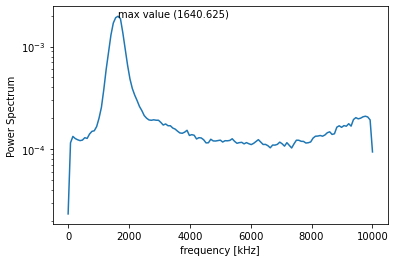


Velocity:  14.559837560000002
Max Frequency value:  1718.75


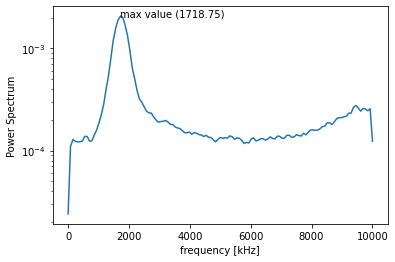

In [47]:
df6 = pd.read_csv(path_mat + ustream[5], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 6*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df6[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

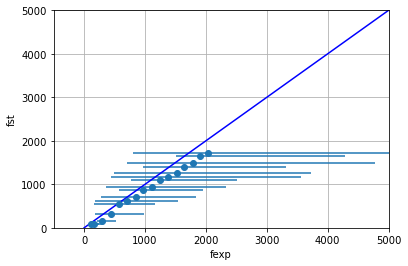

In [48]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y5

Velocity:  1.009313288
Max Frequency value:  78.125


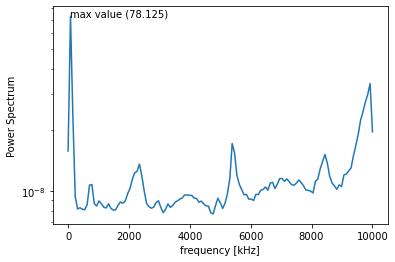


Velocity:  1.4167108320000001
Max Frequency value:  78.125


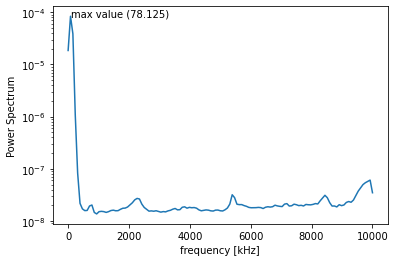


Velocity:  2.2813334960000002
Max Frequency value:  156.25


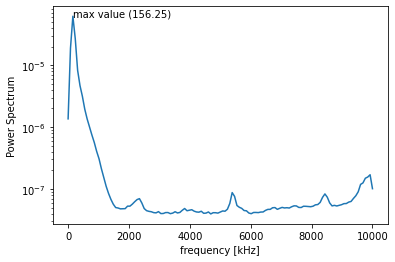


Velocity:  3.2673217759999997
Max Frequency value:  312.5


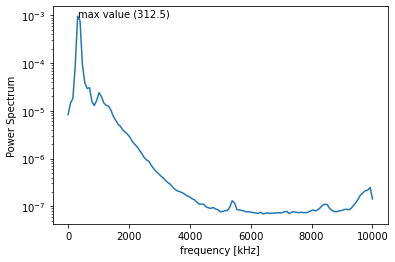


Velocity:  4.192257964
Max Frequency value:  546.875


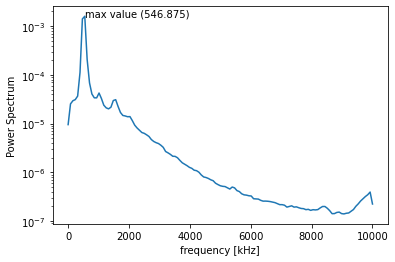


Velocity:  5.118216124000001
Max Frequency value:  625.0


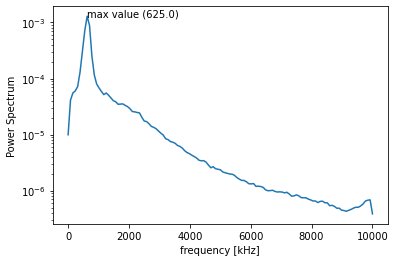


Velocity:  6.063136588000001
Max Frequency value:  703.125


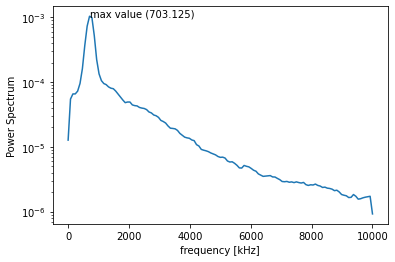


Velocity:  7.08990928
Max Frequency value:  859.375


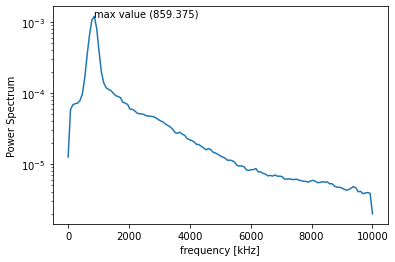


Velocity:  8.063943064
Max Frequency value:  937.5


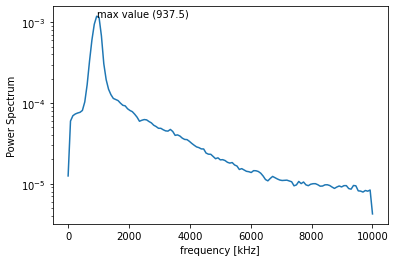


Velocity:  8.948378244
Max Frequency value:  1093.75


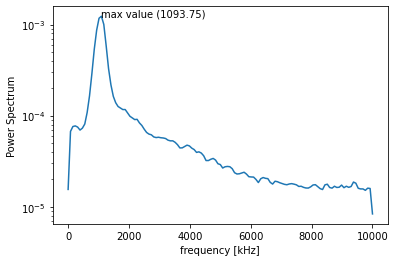


Velocity:  9.92596746
Max Frequency value:  1250.0


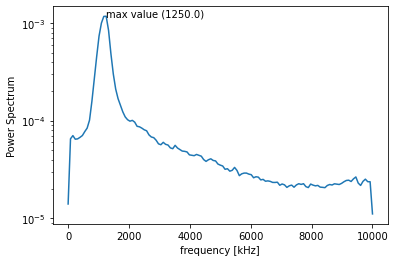


Velocity:  10.873764904000002
Max Frequency value:  1250.0


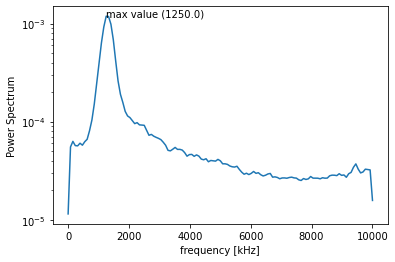


Velocity:  11.706912548
Max Frequency value:  1328.125


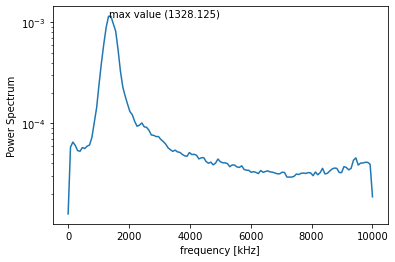


Velocity:  12.735523072
Max Frequency value:  1484.375


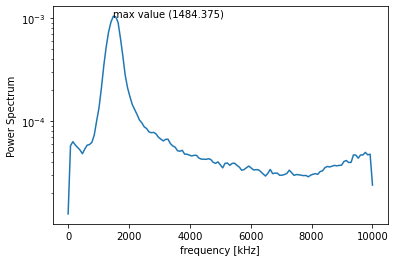


Velocity:  13.714520720000001
Max Frequency value:  1640.625


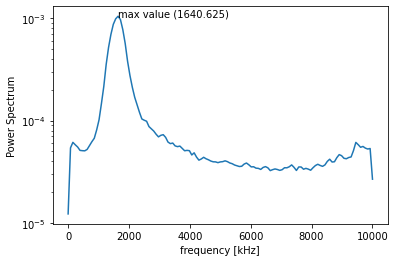


Velocity:  14.569816816000001
Max Frequency value:  1718.75


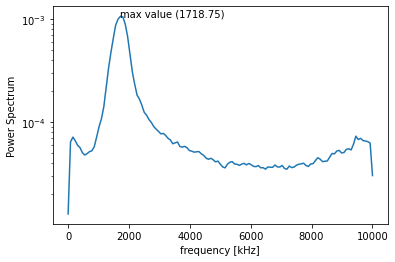

In [49]:
df7 = pd.read_csv(path_mat + ustream[6], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 7*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df7[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

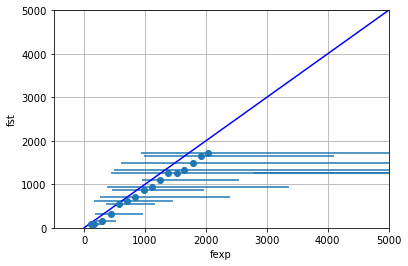

In [50]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y6

Velocity:  1.032131604
Max Frequency value:  78.125


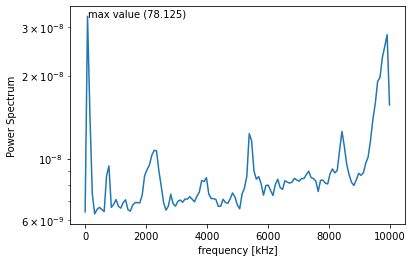


Velocity:  1.41221072
Max Frequency value:  78.125


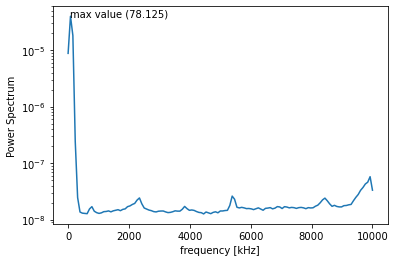


Velocity:  2.3574661160000003
Max Frequency value:  156.25


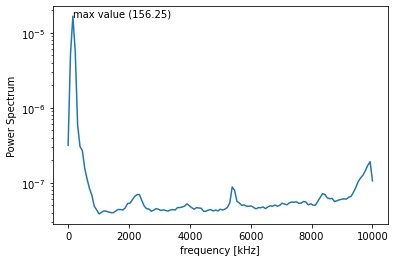


Velocity:  3.2873661679999997
Max Frequency value:  312.5


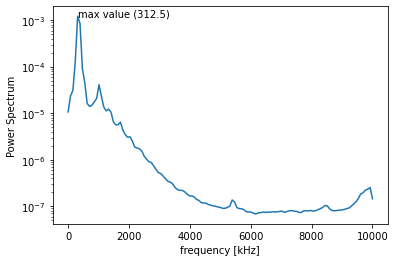


Velocity:  4.202237220000001
Max Frequency value:  546.875


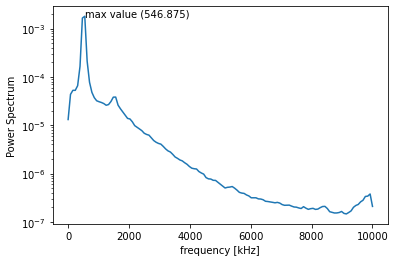


Velocity:  5.16001392
Max Frequency value:  625.0


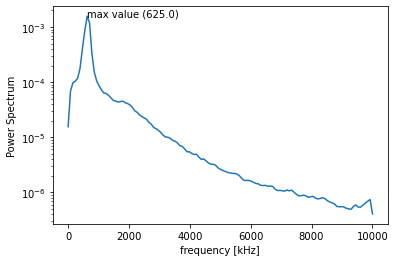


Velocity:  6.084993048
Max Frequency value:  703.125


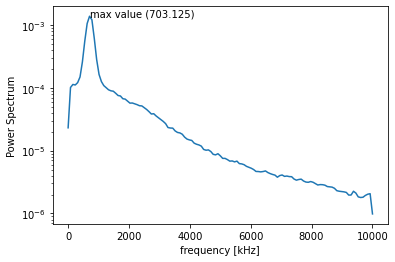


Velocity:  7.059026832
Max Frequency value:  859.375


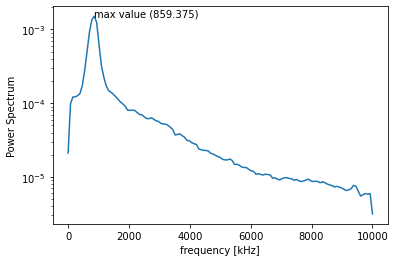


Velocity:  8.05975212
Max Frequency value:  937.5


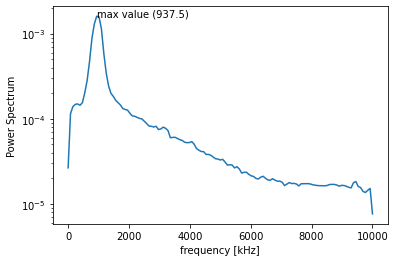


Velocity:  8.958494908
Max Frequency value:  1015.625


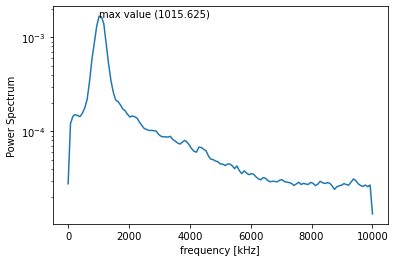


Velocity:  9.943272279999999
Max Frequency value:  1171.875


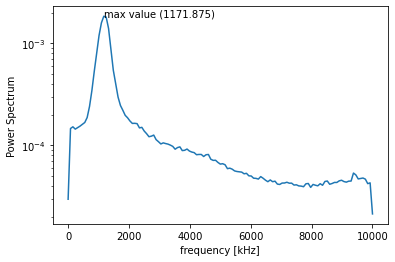


Velocity:  10.895707244
Max Frequency value:  1250.0


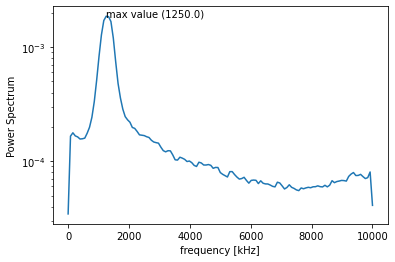


Velocity:  11.72189002
Max Frequency value:  1406.25


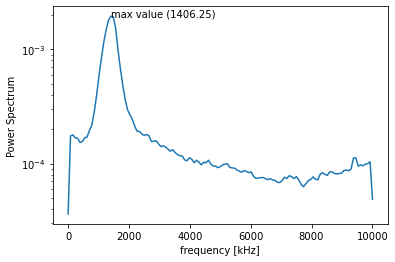


Velocity:  12.754459612
Max Frequency value:  1484.375


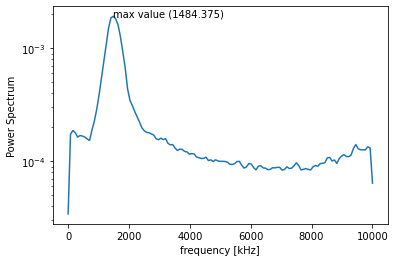


Velocity:  13.736523176000002
Max Frequency value:  1640.625


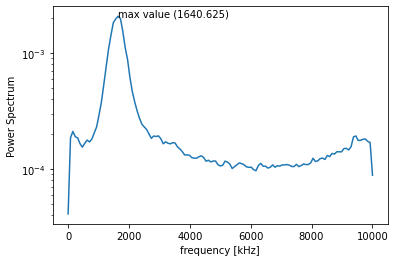


Velocity:  14.607320612
Max Frequency value:  1796.875


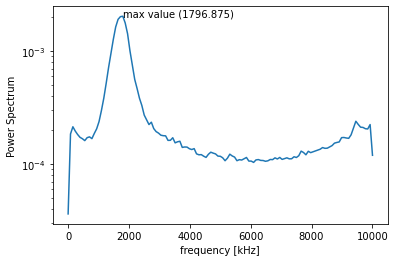

In [51]:
df8 = pd.read_csv(path_mat + ustream[7], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 8*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df8[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

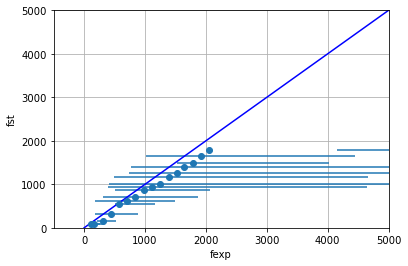

In [52]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y7

Velocity:  1.0390105920000001
Max Frequency value:  9921.875


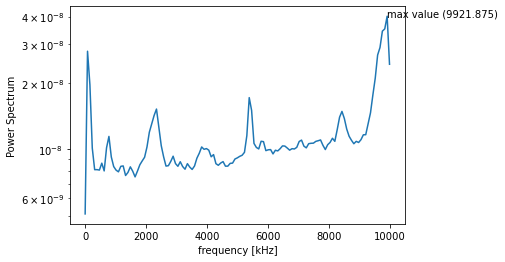


Velocity:  1.443282104
Max Frequency value:  78.125


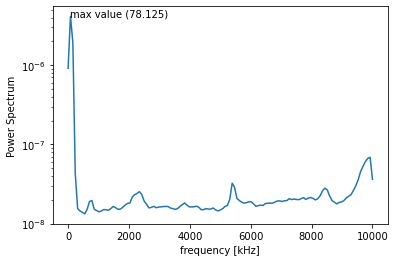


Velocity:  2.37763074
Max Frequency value:  156.25


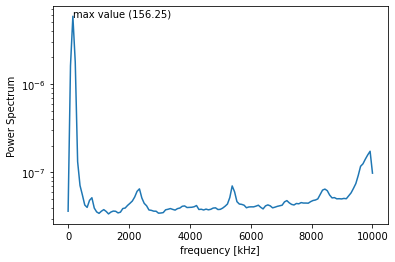


Velocity:  3.225128932
Max Frequency value:  312.5


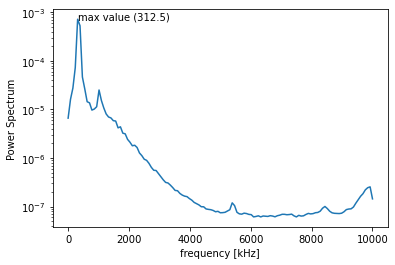


Velocity:  4.2365119280000005
Max Frequency value:  546.875


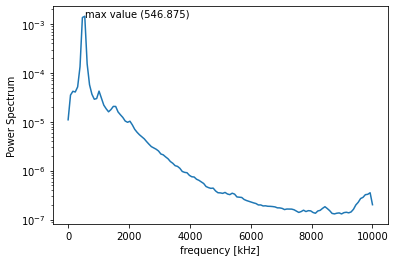


Velocity:  5.163741112
Max Frequency value:  625.0


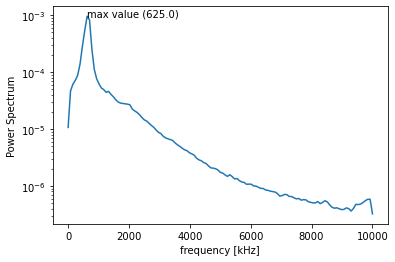


Velocity:  6.077323964
Max Frequency value:  703.125


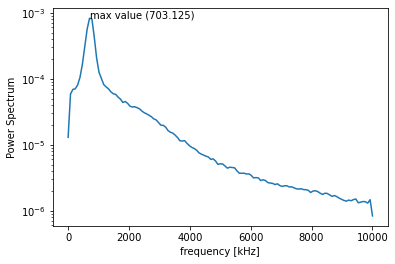


Velocity:  7.083021704000001
Max Frequency value:  859.375


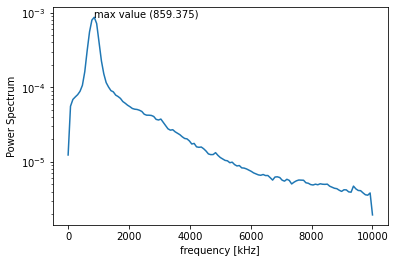


Velocity:  7.948468815999999
Max Frequency value:  937.5


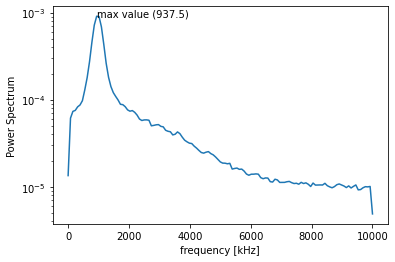


Velocity:  8.990167452
Max Frequency value:  1093.75


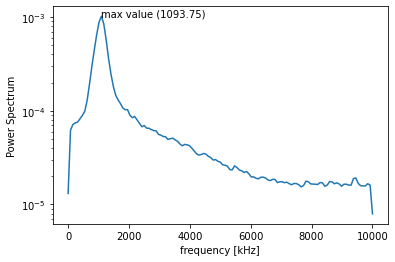


Velocity:  9.957244956
Max Frequency value:  1250.0


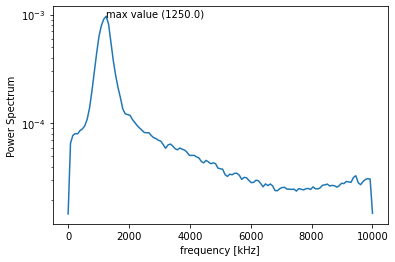


Velocity:  10.916919604
Max Frequency value:  1328.125


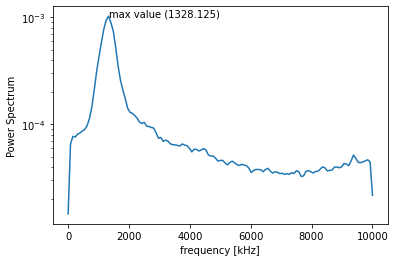


Velocity:  11.720799344
Max Frequency value:  1406.25


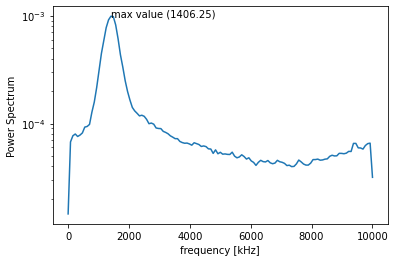


Velocity:  12.770862692
Max Frequency value:  1562.5


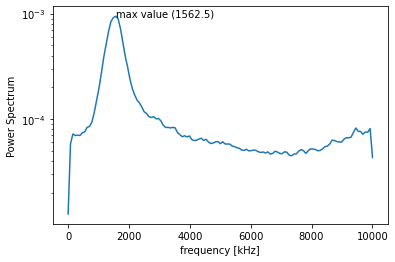


Velocity:  13.58892122
Max Frequency value:  1718.75


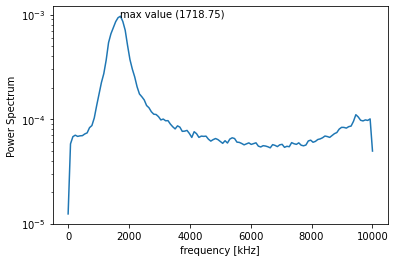


Velocity:  14.665031972000001
Max Frequency value:  1718.75


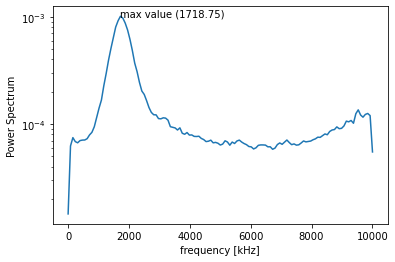

In [53]:
df9 = pd.read_csv(path_mat + ustream[8], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 9*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df9[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

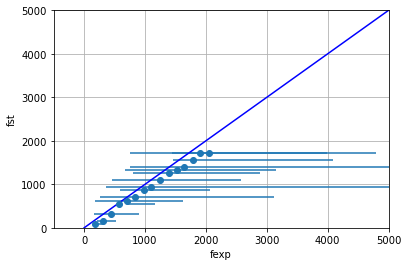

In [54]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y8

Velocity:  1.033273808
Max Frequency value:  9921.875


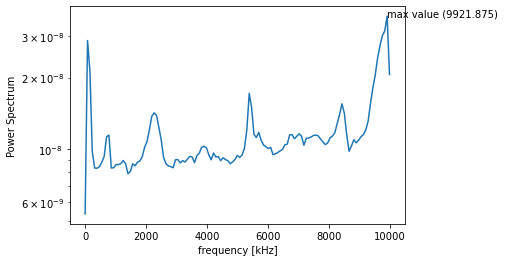


Velocity:  1.39164246
Max Frequency value:  78.125


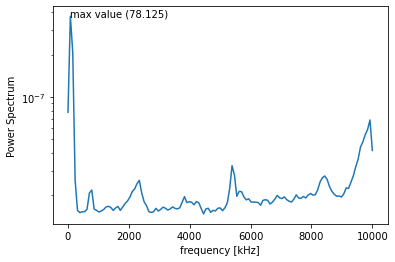


Velocity:  2.367874772
Max Frequency value:  156.25


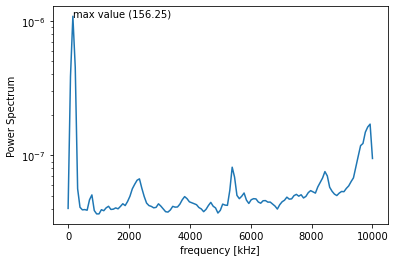


Velocity:  3.291943572
Max Frequency value:  312.5


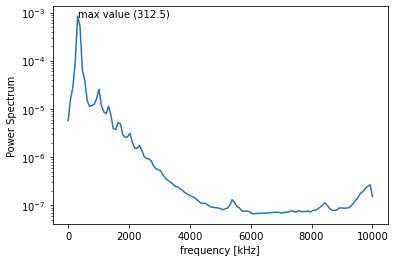


Velocity:  4.141563
Max Frequency value:  546.875


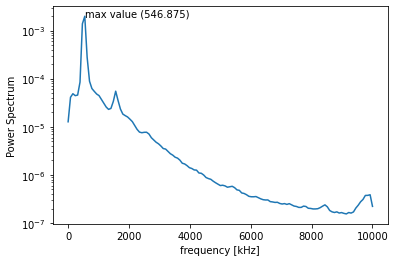


Velocity:  5.139325428
Max Frequency value:  625.0


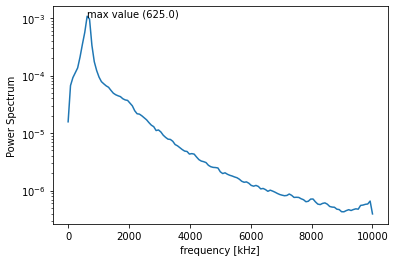


Velocity:  6.07248892
Max Frequency value:  781.25


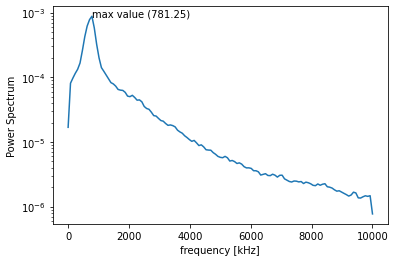


Velocity:  7.08655996
Max Frequency value:  859.375


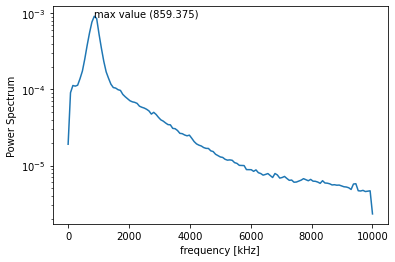


Velocity:  8.070976636
Max Frequency value:  1015.625


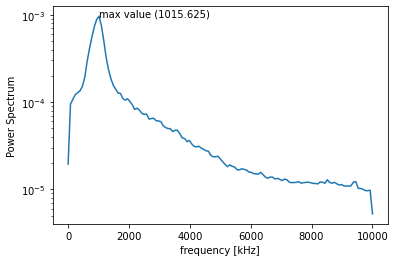


Velocity:  8.9647985
Max Frequency value:  1093.75


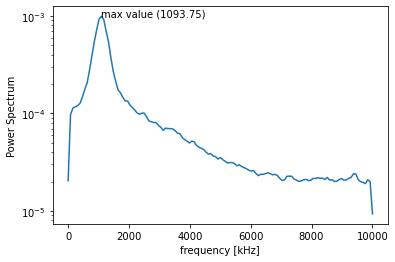


Velocity:  9.905674015999999
Max Frequency value:  1250.0


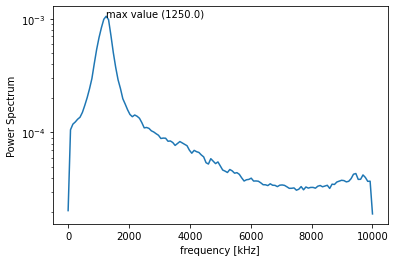


Velocity:  10.90667412
Max Frequency value:  1328.125


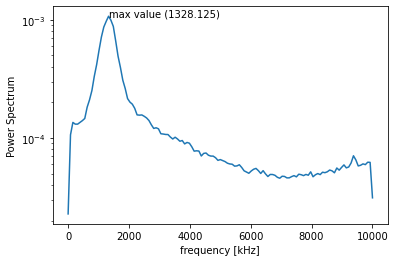


Velocity:  11.703305588000001
Max Frequency value:  1484.375


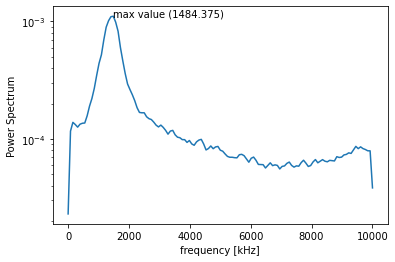


Velocity:  12.731400831999999
Max Frequency value:  1562.5


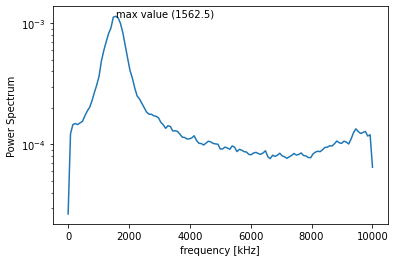


Velocity:  13.711197164
Max Frequency value:  1562.5


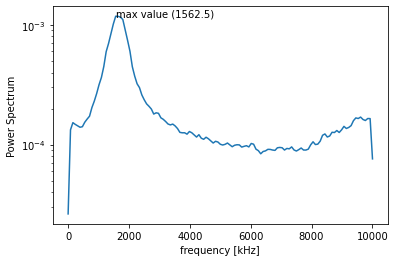


Velocity:  14.574454336
Max Frequency value:  1718.75


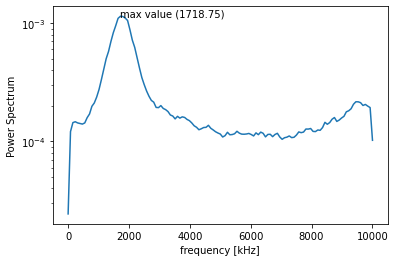

In [59]:
df10 = pd.read_csv(path_mat + ustream[9], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 10*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df10[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

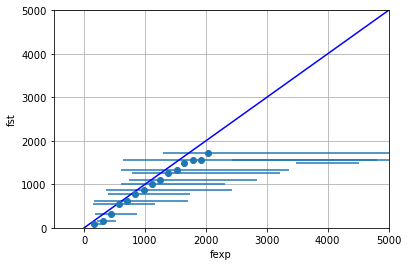

In [60]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y9

Velocity:  1.043459176
Max Frequency value:  9921.875


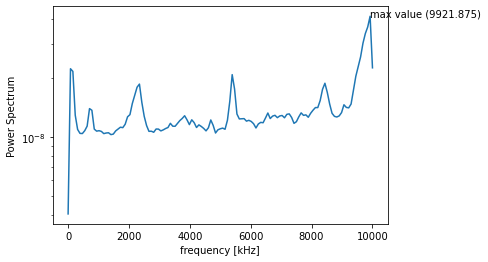


Velocity:  1.3899678
Max Frequency value:  78.125


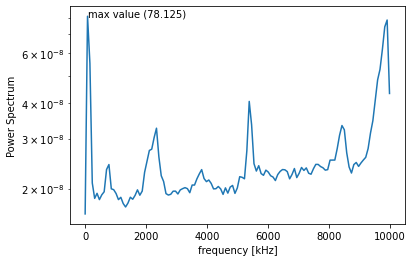


Velocity:  2.366620924
Max Frequency value:  156.25


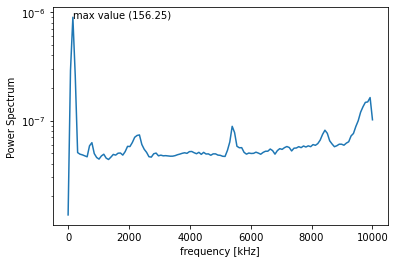


Velocity:  3.2765882279999996
Max Frequency value:  312.5


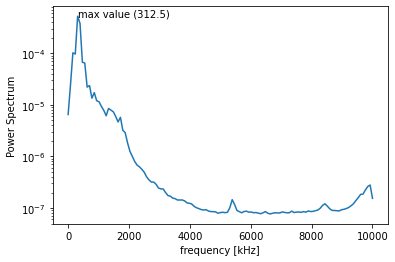


Velocity:  4.199583528
Max Frequency value:  468.75


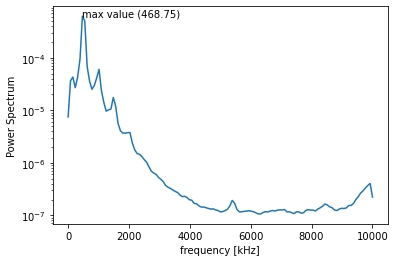


Velocity:  5.284651564
Max Frequency value:  625.0


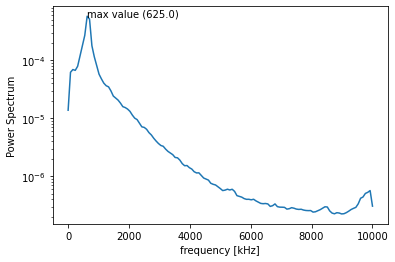


Velocity:  6.147341928
Max Frequency value:  781.25


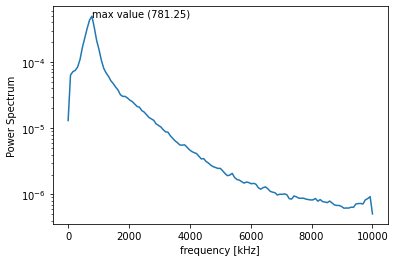


Velocity:  7.087616284000001
Max Frequency value:  937.5


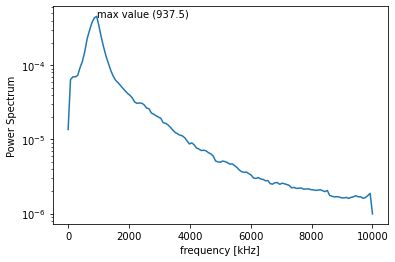


Velocity:  8.067618728000001
Max Frequency value:  1015.625


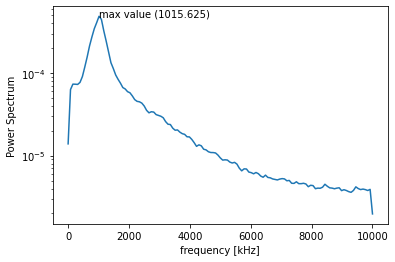


Velocity:  8.929914044
Max Frequency value:  1093.75


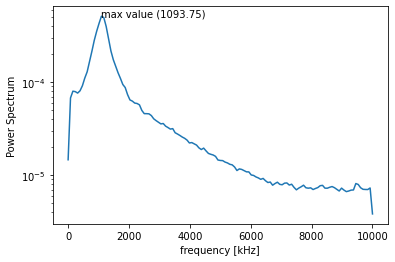


Velocity:  9.99896546
Max Frequency value:  1250.0


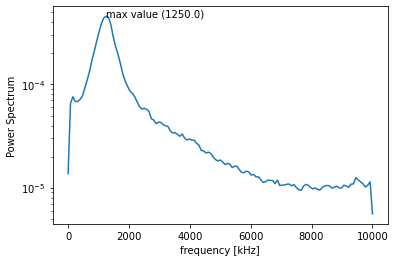


Velocity:  10.75651294
Max Frequency value:  1406.25


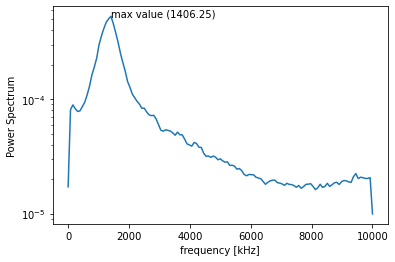


Velocity:  11.818041268
Max Frequency value:  1484.375


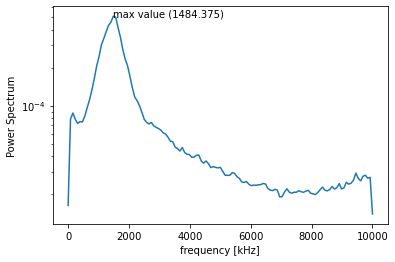


Velocity:  12.698800784
Max Frequency value:  1640.625


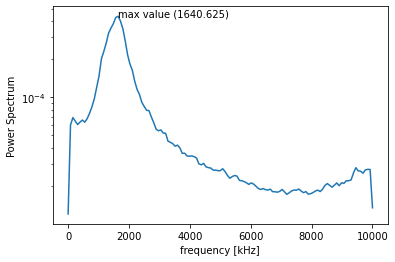


Velocity:  13.62773898
Max Frequency value:  1718.75


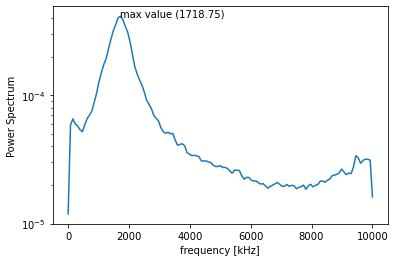


Velocity:  14.569782464
Max Frequency value:  1875.0


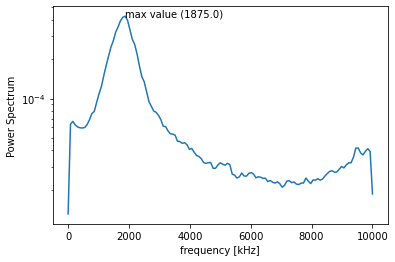

In [55]:
df11 = pd.read_csv(path_mat + ustream[10], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 11*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df11[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

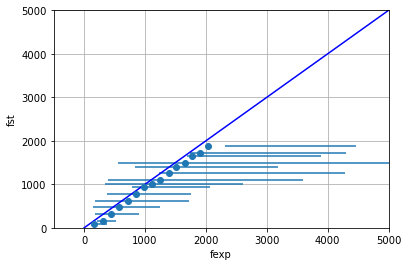

In [56]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y10

Velocity:  1.057242916
Max Frequency value:  78.125


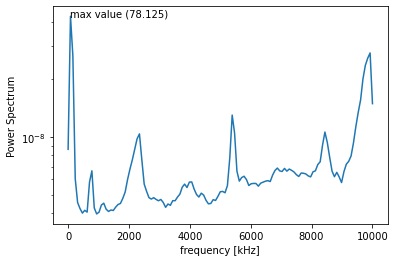


Velocity:  1.39013956
Max Frequency value:  78.125


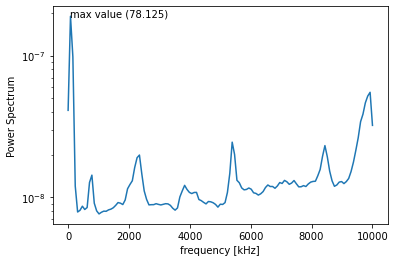


Velocity:  2.336434104
Max Frequency value:  78.125


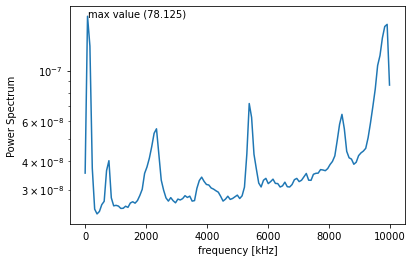


Velocity:  3.3128982920000003
Max Frequency value:  312.5


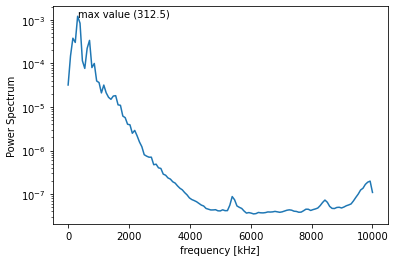


Velocity:  4.169482588
Max Frequency value:  1015.625


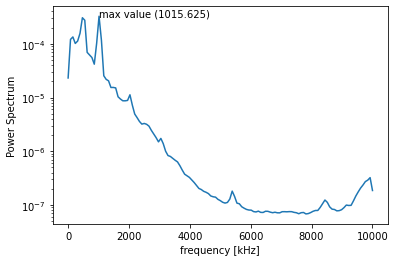


Velocity:  5.222096572
Max Frequency value:  312.5


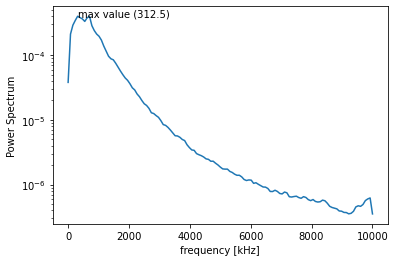


Velocity:  6.157080720000001
Max Frequency value:  703.125


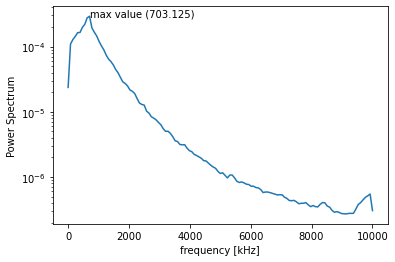


Velocity:  7.03949772
Max Frequency value:  781.25


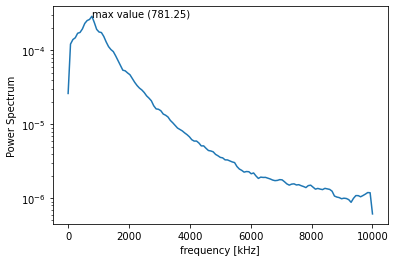


Velocity:  8.040566528
Max Frequency value:  859.375


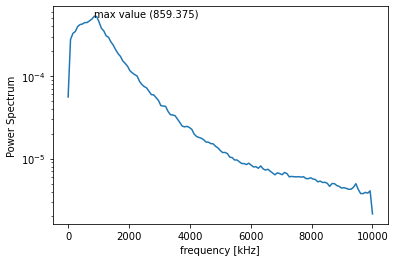


Velocity:  8.940176704
Max Frequency value:  1015.625


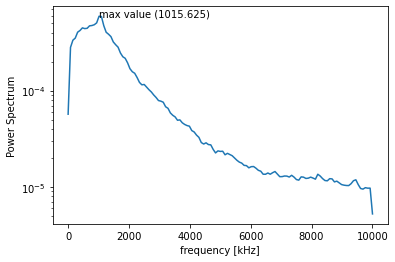


Velocity:  9.891598284
Max Frequency value:  1171.875


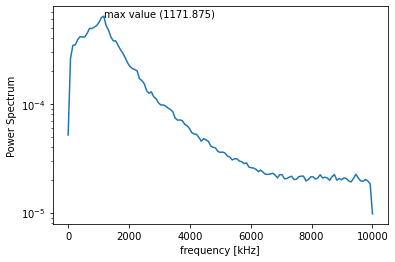


Velocity:  10.866748508
Max Frequency value:  1328.125


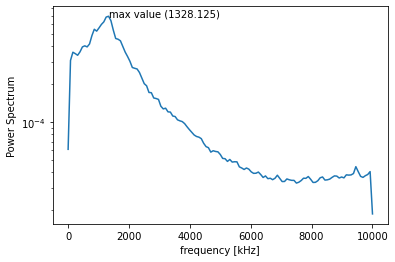


Velocity:  11.794484384
Max Frequency value:  1406.25


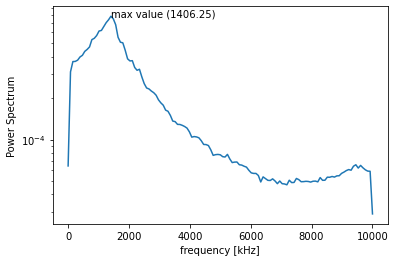


Velocity:  12.73072238
Max Frequency value:  1562.5


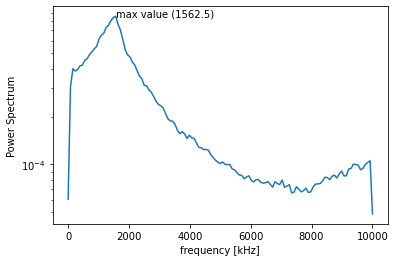


Velocity:  13.682169723999998
Max Frequency value:  1640.625


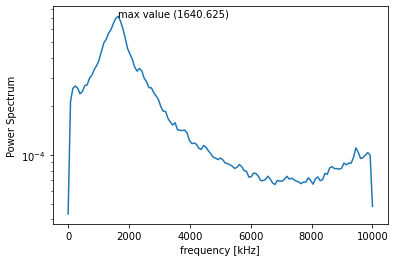


Velocity:  14.601111488
Max Frequency value:  1718.75


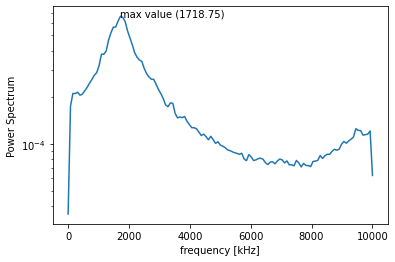

In [57]:
df12 = pd.read_csv(path_mat + ustream[11], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 12*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df12[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

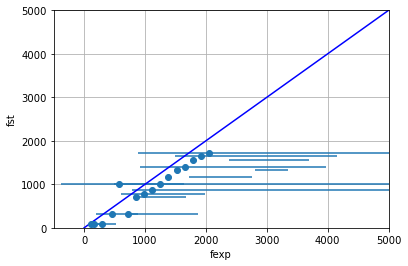

In [58]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')